In [1]:
import sys
sys.path.insert(1, 'source')

FORCE = False

In [2]:
from util import getHash

name = 'FNN-Classification-Simple'

props={
    'path'          : 'source/data',
    'seed'          : 42,
    'split'         : 0.8,
    'test_split'    : 0.5,
    'control'       : False,
    'huntington'    : True,
    'left'          : True,
    'right'         : False,
    'threshold'     : 0.6,
    'binarize'      : True,
    'not_connected' : True,
    'single'        : None,
    'target'        : False,
    'roi'           : True,
    'brain'         : False,
    'features'      : [],
    'features_vox'  : [],
    'radiomics'     : ['b25'],
    'radiomics_vox' : ['k5_b25','k7_b25','k9_b25','k11_b25','k13_b25'],
    'balance_data'  : True,
    'debug'         : False,
    'targets_all'   : False,
    'collapse_max'  : False,
    'extras'        : None,
    'pca'           : 0.95,
}

architecture={
    'activation'    : 'sigmoid',
    'layers'        : [1024,512,256,128],
    'loss'          : 'CCE',
    'learning_rate' : 0.001,
    'batch_size'    : 100000,
    'patience'      : 10,
}

HASH = getHash(name,[architecture,props])
print(HASH)

FNN-Classification-Simple-sigmoid_100000_1024512256128_0001_CCE_10_1_1_0_0_0_0_None___1_1_1_sourcedata_095_b25_k5_b25k7_b25k9_b25k11_b25k13_b25_0_1_42_None_08_0_0_05_06


In [3]:
from DataGeneratorClassificationFNN import DataGenerator

gen = DataGenerator(**props)
train, val, test = gen.getData()

print('train')
print(train[0].shape)
print(train[1].shape)
print('validation')
print(val[0].shape)
print(val[1].shape)
print('test')
print(test[0].shape)
print(test[1].shape)

train
(1601030, 21)
(1601030, 8)
validation
(238212, 21)
(238212, 8)
test
(194359, 21)
(194359, 8)


In [4]:
from ModelClassificationFNN import *
from tensorflow.keras.optimizers import Adam

stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=architecture['patience'],
)
save = tf.keras.callbacks.ModelCheckpoint(
    filepath='source/data/models/{}.weights.h5'.format(HASH),
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

model = buildModel(train[0].shape[1], train[1].shape[1], activation=architecture['activation'], layers=architecture['layers'])

model.compile(loss=locals()[architecture['loss']], optimizer=Adam(learning_rate=architecture['learning_rate']), jit_compile=True, metrics=[STD,MAE])

model.summary()

Model: "FFN"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 21)]              0         


 dense (Dense)               (None, 1024)              22528     


 dense_1 (Dense)             (None, 512)               524800    


 dense_2 (Dense)             (None, 256)               131328    


 dense_3 (Dense)             (None, 128)               32896     


 dense_4 (Dense)             (None, 8)                 1032      


Total params: 712584 (2.72 MB)


Trainable params: 712584 (2.72 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [5]:
import os
from util import pickleSave

if FORCE or not os.path.exists('source/data/models/{}.pkl'.format(HASH)):
    history = model.fit(DataWrapper(train,architecture['batch_size']),
        validation_data=DataWrapper(val,architecture['batch_size'],False),
        epochs=10000,
        verbose=1,
        callbacks = [save,stop],
    )
    pickleSave('source/data/models/{}.pkl'.format(HASH), history.history)

model.load_weights('source/data/models/{}.weights.h5'.format(HASH))

Epoch 1/10000


 1/17 [>.............................] - ETA: 1:10 - loss: 2.2597 - STD: 0.0771 - MAE: 0.2193

 2/17 [==>...........................] - ETA: 1s - loss: 2.1904 - STD: 0.0549 - MAE: 0.2191  

 3/17 [====>.........................] - ETA: 1s - loss: 2.1550 - STD: 0.0430 - MAE: 0.2189

 4/17 [======>.......................] - ETA: 0s - loss: 2.1397 - STD: 0.0398 - MAE: 0.2188

 5/17 [=======>......................] - ETA: 0s - loss: 2.1331 - STD: 0.0387 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 0s - loss: 2.1297 - STD: 0.0379 - MAE: 0.2186

 7/17 [===========>..................] - ETA: 0s - loss: 2.1272 - STD: 0.0372 - MAE: 0.2186

 8/17 [=============>................] - ETA: 0s - loss: 2.1251 - STD: 0.0364 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 0s - loss: 2.1223 - STD: 0.0353 - MAE: 0.2186

10/17 [================>.............] - ETA: 0s - loss: 2.1193 - STD: 0.0338 - MAE: 0.2186

11/17 [==================>...........] - ETA: 0s - loss: 2.1161 - STD: 0.0322 - MAE: 0.2186

12/17 [====================>.........] - ETA: 0s - loss: 2.1130 - STD: 0.0303 - MAE: 0.2186

13/17 [=====================>........] - ETA: 0s - loss: 2.1130 - STD: 0.0286 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.1104 - STD: 0.0273 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.1084 - STD: 0.0264 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.1067 - STD: 0.0258 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.1054 - STD: 0.0253 - MAE: 0.2186

17/17 [==============================] - 8s 200ms/step - loss: 2.1054 - STD: 0.0253 - MAE: 0.2186 - val_loss: 2.0848 - val_STD: 0.0170 - val_MAE: 0.2186


Epoch 2/10000


 1/17 [>.............................] - ETA: 1s - loss: 2.0854 - STD: 0.0170 - MAE: 0.2186

 2/17 [==>...........................] - ETA: 1s - loss: 2.0854 - STD: 0.0163 - MAE: 0.2187

 3/17 [====>.........................] - ETA: 1s - loss: 2.0844 - STD: 0.0155 - MAE: 0.2187

 4/17 [======>.......................] - ETA: 0s - loss: 2.0835 - STD: 0.0144 - MAE: 0.2187

 5/17 [=======>......................] - ETA: 0s - loss: 2.0826 - STD: 0.0133 - MAE: 0.2187

 6/17 [=========>....................] - ETA: 0s - loss: 2.0818 - STD: 0.0123 - MAE: 0.2187

 7/17 [===========>..................] - ETA: 0s - loss: 2.0810 - STD: 0.0115 - MAE: 0.2186

 8/17 [=============>................] - ETA: 0s - loss: 2.0804 - STD: 0.0110 - MAE: 0.2186

 9/17 [==============>...............] - ETA: 0s - loss: 2.0800 - STD: 0.0108 - MAE: 0.2186

10/17 [================>.............] - ETA: 0s - loss: 2.0797 - STD: 0.0108 - MAE: 0.2186

11/17 [==================>...........] - ETA: 0s - loss: 2.0796 - STD: 0.0109 - MAE: 0.2186

13/17 [=====================>........] - ETA: 0s - loss: 2.0793 - STD: 0.0112 - MAE: 0.2186

14/17 [=======================>......] - ETA: 0s - loss: 2.0792 - STD: 0.0112 - MAE: 0.2186

15/17 [=========================>....] - ETA: 0s - loss: 2.0789 - STD: 0.0112 - MAE: 0.2186

16/17 [===========================>..] - ETA: 0s - loss: 2.0786 - STD: 0.0111 - MAE: 0.2186

17/17 [==============================] - ETA: 0s - loss: 2.0783 - STD: 0.0109 - MAE: 0.2186

17/17 [==============================] - 1s 78ms/step - loss: 2.0783 - STD: 0.0109 - MAE: 0.2186 - val_loss: 2.0738 - val_STD: 0.0074 - val_MAE: 0.2185


Epoch 3/10000


 1/17 [>.............................] - ETA: 0s - loss: 2.0736 - STD: 0.0074 - MAE: 0.2185

 2/17 [==>...........................] - ETA: 1s - loss: 2.0729 - STD: 0.0072 - MAE: 0.2185

 3/17 [====>.........................] - ETA: 1s - loss: 2.0725 - STD: 0.0071 - MAE: 0.2185

 4/17 [======>.......................] - ETA: 1s - loss: 2.0721 - STD: 0.0071 - MAE: 0.2185

 5/17 [=======>......................] - ETA: 0s - loss: 2.0717 - STD: 0.0071 - MAE: 0.2185

 6/17 [=========>....................] - ETA: 0s - loss: 2.0713 - STD: 0.0072 - MAE: 0.2185

 7/17 [===========>..................] - ETA: 0s - loss: 2.0708 - STD: 0.0073 - MAE: 0.2184

 8/17 [=============>................] - ETA: 0s - loss: 2.0703 - STD: 0.0073 - MAE: 0.2184

 9/17 [==============>...............] - ETA: 0s - loss: 2.0697 - STD: 0.0074 - MAE: 0.2184

10/17 [================>.............] - ETA: 0s - loss: 2.0690 - STD: 0.0075 - MAE: 0.2184

11/17 [==================>...........] - ETA: 0s - loss: 2.0683 - STD: 0.0076 - MAE: 0.2184

12/17 [====================>.........] - ETA: 0s - loss: 2.0674 - STD: 0.0077 - MAE: 0.2183

13/17 [=====================>........] - ETA: 0s - loss: 2.0664 - STD: 0.0078 - MAE: 0.2183

14/17 [=======================>......] - ETA: 0s - loss: 2.0654 - STD: 0.0079 - MAE: 0.2183

15/17 [=========================>....] - ETA: 0s - loss: 2.0642 - STD: 0.0081 - MAE: 0.2182

16/17 [===========================>..] - ETA: 0s - loss: 2.0629 - STD: 0.0083 - MAE: 0.2182

17/17 [==============================] - ETA: 0s - loss: 2.0614 - STD: 0.0085 - MAE: 0.2181

17/17 [==============================] - 1s 82ms/step - loss: 2.0614 - STD: 0.0085 - MAE: 0.2181 - val_loss: 2.0321 - val_STD: 0.0125 - val_MAE: 0.2171


Epoch 4/10000


 1/17 [>.............................] - ETA: 1s - loss: 2.0332 - STD: 0.0125 - MAE: 0.2171

 2/17 [==>...........................] - ETA: 1s - loss: 2.0290 - STD: 0.0130 - MAE: 0.2170

 3/17 [====>.........................] - ETA: 1s - loss: 2.0250 - STD: 0.0137 - MAE: 0.2168

 4/17 [======>.......................] - ETA: 0s - loss: 2.0208 - STD: 0.0146 - MAE: 0.2167

 6/17 [=========>....................] - ETA: 0s - loss: 2.0137 - STD: 0.0168 - MAE: 0.2163

 7/17 [===========>..................] - ETA: 0s - loss: 2.0070 - STD: 0.0181 - MAE: 0.2161

 8/17 [=============>................] - ETA: 0s - loss: 2.0001 - STD: 0.0196 - MAE: 0.2158

 9/17 [==============>...............] - ETA: 0s - loss: 1.9933 - STD: 0.0211 - MAE: 0.2155

10/17 [================>.............] - ETA: 0s - loss: 1.9862 - STD: 0.0228 - MAE: 0.2152

11/17 [==================>...........] - ETA: 0s - loss: 1.9790 - STD: 0.0246 - MAE: 0.2149

12/17 [====================>.........] - ETA: 0s - loss: 1.9720 - STD: 0.0266 - MAE: 0.2146

13/17 [=====================>........] - ETA: 0s - loss: 1.9649 - STD: 0.0286 - MAE: 0.2142

14/17 [=======================>......] - ETA: 0s - loss: 1.9582 - STD: 0.0307 - MAE: 0.2138

15/17 [=========================>....] - ETA: 0s - loss: 1.9514 - STD: 0.0328 - MAE: 0.2134

16/17 [===========================>..] - ETA: 0s - loss: 1.9450 - STD: 0.0349 - MAE: 0.2130

17/17 [==============================] - ETA: 0s - loss: 1.9388 - STD: 0.0369 - MAE: 0.2127

17/17 [==============================] - 1s 77ms/step - loss: 1.9388 - STD: 0.0369 - MAE: 0.2127 - val_loss: 1.8353 - val_STD: 0.0752 - val_MAE: 0.2054


Epoch 5/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.8367 - STD: 0.0741 - MAE: 0.2056

 2/17 [==>...........................] - ETA: 1s - loss: 1.8375 - STD: 0.0754 - MAE: 0.2054

 3/17 [====>.........................] - ETA: 1s - loss: 1.8351 - STD: 0.0766 - MAE: 0.2051

 4/17 [======>.......................] - ETA: 0s - loss: 1.8333 - STD: 0.0780 - MAE: 0.2049

 5/17 [=======>......................] - ETA: 0s - loss: 1.8310 - STD: 0.0789 - MAE: 0.2046

 6/17 [=========>....................] - ETA: 0s - loss: 1.8289 - STD: 0.0797 - MAE: 0.2044

 7/17 [===========>..................] - ETA: 0s - loss: 1.8270 - STD: 0.0807 - MAE: 0.2042

 8/17 [=============>................] - ETA: 0s - loss: 1.8248 - STD: 0.0812 - MAE: 0.2041

 9/17 [==============>...............] - ETA: 0s - loss: 1.8224 - STD: 0.0819 - MAE: 0.2039

10/17 [================>.............] - ETA: 0s - loss: 1.8203 - STD: 0.0825 - MAE: 0.2038

11/17 [==================>...........] - ETA: 0s - loss: 1.8180 - STD: 0.0828 - MAE: 0.2036

12/17 [====================>.........] - ETA: 0s - loss: 1.8158 - STD: 0.0832 - MAE: 0.2035

13/17 [=====================>........] - ETA: 0s - loss: 1.8136 - STD: 0.0836 - MAE: 0.2034

15/17 [=========================>....] - ETA: 0s - loss: 1.8113 - STD: 0.0839 - MAE: 0.2033

16/17 [===========================>..] - ETA: 0s - loss: 1.8091 - STD: 0.0842 - MAE: 0.2032

17/17 [==============================] - ETA: 0s - loss: 1.8067 - STD: 0.0843 - MAE: 0.2031

17/17 [==============================] - 1s 77ms/step - loss: 1.8067 - STD: 0.0843 - MAE: 0.2031 - val_loss: 1.7633 - val_STD: 0.0907 - val_MAE: 0.2011


Epoch 6/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7680 - STD: 0.0885 - MAE: 0.2015

 2/17 [==>...........................] - ETA: 1s - loss: 1.7681 - STD: 0.0904 - MAE: 0.2012

 3/17 [====>.........................] - ETA: 1s - loss: 1.7647 - STD: 0.0910 - MAE: 0.2009

 4/17 [======>.......................] - ETA: 0s - loss: 1.7630 - STD: 0.0913 - MAE: 0.2008

 5/17 [=======>......................] - ETA: 0s - loss: 1.7606 - STD: 0.0918 - MAE: 0.2007

 7/17 [===========>..................] - ETA: 0s - loss: 1.7580 - STD: 0.0919 - MAE: 0.2007

 8/17 [=============>................] - ETA: 0s - loss: 1.7564 - STD: 0.0922 - MAE: 0.2006

 9/17 [==============>...............] - ETA: 0s - loss: 1.7541 - STD: 0.0925 - MAE: 0.2004

10/17 [================>.............] - ETA: 0s - loss: 1.7518 - STD: 0.0929 - MAE: 0.2003

11/17 [==================>...........] - ETA: 0s - loss: 1.7496 - STD: 0.0933 - MAE: 0.2002

12/17 [====================>.........] - ETA: 0s - loss: 1.7474 - STD: 0.0935 - MAE: 0.2001

13/17 [=====================>........] - ETA: 0s - loss: 1.7459 - STD: 0.0938 - MAE: 0.2000

14/17 [=======================>......] - ETA: 0s - loss: 1.7441 - STD: 0.0941 - MAE: 0.1999

15/17 [=========================>....] - ETA: 0s - loss: 1.7422 - STD: 0.0943 - MAE: 0.1998

16/17 [===========================>..] - ETA: 0s - loss: 1.7403 - STD: 0.0945 - MAE: 0.1997

17/17 [==============================] - ETA: 0s - loss: 1.7388 - STD: 0.0947 - MAE: 0.1996

17/17 [==============================] - 1s 77ms/step - loss: 1.7388 - STD: 0.0947 - MAE: 0.1996 - val_loss: 1.7179 - val_STD: 0.1006 - val_MAE: 0.1983


Epoch 7/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.7121 - STD: 0.0985 - MAE: 0.1982

 2/17 [==>...........................] - ETA: 1s - loss: 1.7108 - STD: 0.0987 - MAE: 0.1981

 3/17 [====>.........................] - ETA: 1s - loss: 1.7094 - STD: 0.0984 - MAE: 0.1981

 4/17 [======>.......................] - ETA: 0s - loss: 1.7093 - STD: 0.0986 - MAE: 0.1980

 5/17 [=======>......................] - ETA: 0s - loss: 1.7078 - STD: 0.0985 - MAE: 0.1980

 6/17 [=========>....................] - ETA: 0s - loss: 1.7071 - STD: 0.0988 - MAE: 0.1979

 7/17 [===========>..................] - ETA: 0s - loss: 1.7058 - STD: 0.0991 - MAE: 0.1978

 8/17 [=============>................] - ETA: 0s - loss: 1.7048 - STD: 0.0993 - MAE: 0.1977

 9/17 [==============>...............] - ETA: 0s - loss: 1.7045 - STD: 0.0996 - MAE: 0.1977

10/17 [================>.............] - ETA: 0s - loss: 1.7037 - STD: 0.0998 - MAE: 0.1976

11/17 [==================>...........] - ETA: 0s - loss: 1.7031 - STD: 0.1000 - MAE: 0.1976

12/17 [====================>.........] - ETA: 0s - loss: 1.7022 - STD: 0.1001 - MAE: 0.1975

14/17 [=======================>......] - ETA: 0s - loss: 1.7027 - STD: 0.1004 - MAE: 0.1975

15/17 [=========================>....] - ETA: 0s - loss: 1.7023 - STD: 0.1004 - MAE: 0.1975

16/17 [===========================>..] - ETA: 0s - loss: 1.7022 - STD: 0.1005 - MAE: 0.1975

17/17 [==============================] - ETA: 0s - loss: 1.7019 - STD: 0.1007 - MAE: 0.1974

17/17 [==============================] - 1s 77ms/step - loss: 1.7019 - STD: 0.1007 - MAE: 0.1974 - val_loss: 1.7153 - val_STD: 0.1063 - val_MAE: 0.1971


Epoch 8/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6905 - STD: 0.1047 - MAE: 0.1962

 2/17 [==>...........................] - ETA: 1s - loss: 1.6954 - STD: 0.1043 - MAE: 0.1964

 3/17 [====>.........................] - ETA: 1s - loss: 1.6931 - STD: 0.1043 - MAE: 0.1963

 4/17 [======>.......................] - ETA: 0s - loss: 1.6922 - STD: 0.1044 - MAE: 0.1963

 5/17 [=======>......................] - ETA: 0s - loss: 1.6907 - STD: 0.1042 - MAE: 0.1963

 6/17 [=========>....................] - ETA: 0s - loss: 1.6909 - STD: 0.1040 - MAE: 0.1963

 7/17 [===========>..................] - ETA: 0s - loss: 1.6905 - STD: 0.1039 - MAE: 0.1963

 8/17 [=============>................] - ETA: 0s - loss: 1.6905 - STD: 0.1040 - MAE: 0.1963

 9/17 [==============>...............] - ETA: 0s - loss: 1.6899 - STD: 0.1040 - MAE: 0.1963

10/17 [================>.............] - ETA: 0s - loss: 1.6896 - STD: 0.1041 - MAE: 0.1962

11/17 [==================>...........] - ETA: 0s - loss: 1.6892 - STD: 0.1042 - MAE: 0.1962

12/17 [====================>.........] - ETA: 0s - loss: 1.6889 - STD: 0.1044 - MAE: 0.1962

13/17 [=====================>........] - ETA: 0s - loss: 1.6885 - STD: 0.1045 - MAE: 0.1961

15/17 [=========================>....] - ETA: 0s - loss: 1.6881 - STD: 0.1047 - MAE: 0.1961

16/17 [===========================>..] - ETA: 0s - loss: 1.6877 - STD: 0.1048 - MAE: 0.1960

17/17 [==============================] - ETA: 0s - loss: 1.6871 - STD: 0.1049 - MAE: 0.1960

17/17 [==============================] - 1s 78ms/step - loss: 1.6871 - STD: 0.1049 - MAE: 0.1960 - val_loss: 1.6924 - val_STD: 0.1059 - val_MAE: 0.1962


Epoch 9/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6795 - STD: 0.1051 - MAE: 0.1956

 2/17 [==>...........................] - ETA: 1s - loss: 1.6788 - STD: 0.1051 - MAE: 0.1956

 3/17 [====>.........................] - ETA: 1s - loss: 1.6785 - STD: 0.1056 - MAE: 0.1955

 4/17 [======>.......................] - ETA: 0s - loss: 1.6777 - STD: 0.1061 - MAE: 0.1954

 5/17 [=======>......................] - ETA: 0s - loss: 1.6779 - STD: 0.1062 - MAE: 0.1954

 6/17 [=========>....................] - ETA: 0s - loss: 1.6772 - STD: 0.1063 - MAE: 0.1953

 7/17 [===========>..................] - ETA: 0s - loss: 1.6769 - STD: 0.1063 - MAE: 0.1953

 8/17 [=============>................] - ETA: 0s - loss: 1.6765 - STD: 0.1063 - MAE: 0.1953

 9/17 [==============>...............] - ETA: 0s - loss: 1.6769 - STD: 0.1063 - MAE: 0.1953

10/17 [================>.............] - ETA: 0s - loss: 1.6763 - STD: 0.1063 - MAE: 0.1953

11/17 [==================>...........] - ETA: 0s - loss: 1.6759 - STD: 0.1064 - MAE: 0.1952

12/17 [====================>.........] - ETA: 0s - loss: 1.6753 - STD: 0.1065 - MAE: 0.1952

13/17 [=====================>........] - ETA: 0s - loss: 1.6748 - STD: 0.1066 - MAE: 0.1952

14/17 [=======================>......] - ETA: 0s - loss: 1.6744 - STD: 0.1066 - MAE: 0.1951

15/17 [=========================>....] - ETA: 0s - loss: 1.6742 - STD: 0.1067 - MAE: 0.1951

16/17 [===========================>..] - ETA: 0s - loss: 1.6735 - STD: 0.1068 - MAE: 0.1950

17/17 [==============================] - 1s 78ms/step - loss: 1.6735 - STD: 0.1069 - MAE: 0.1950 - val_loss: 1.6777 - val_STD: 0.1095 - val_MAE: 0.1949


Epoch 10/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6658 - STD: 0.1091 - MAE: 0.1942

 2/17 [==>...........................] - ETA: 1s - loss: 1.6643 - STD: 0.1091 - MAE: 0.1942

 3/17 [====>.........................] - ETA: 1s - loss: 1.6637 - STD: 0.1088 - MAE: 0.1942

 4/17 [======>.......................] - ETA: 0s - loss: 1.6635 - STD: 0.1084 - MAE: 0.1943

 5/17 [=======>......................] - ETA: 0s - loss: 1.6622 - STD: 0.1085 - MAE: 0.1942

 6/17 [=========>....................] - ETA: 0s - loss: 1.6619 - STD: 0.1087 - MAE: 0.1941

 7/17 [===========>..................] - ETA: 0s - loss: 1.6615 - STD: 0.1089 - MAE: 0.1941

 8/17 [=============>................] - ETA: 0s - loss: 1.6611 - STD: 0.1089 - MAE: 0.1941

 9/17 [==============>...............] - ETA: 0s - loss: 1.6603 - STD: 0.1088 - MAE: 0.1940

10/17 [================>.............] - ETA: 0s - loss: 1.6594 - STD: 0.1089 - MAE: 0.1940

11/17 [==================>...........] - ETA: 0s - loss: 1.6587 - STD: 0.1091 - MAE: 0.1939

12/17 [====================>.........] - ETA: 0s - loss: 1.6581 - STD: 0.1092 - MAE: 0.1939

13/17 [=====================>........] - ETA: 0s - loss: 1.6575 - STD: 0.1092 - MAE: 0.1938

14/17 [=======================>......] - ETA: 0s - loss: 1.6568 - STD: 0.1093 - MAE: 0.1938

16/17 [===========================>..] - ETA: 0s - loss: 1.6560 - STD: 0.1096 - MAE: 0.1937

17/17 [==============================] - ETA: 0s - loss: 1.6554 - STD: 0.1097 - MAE: 0.1936

17/17 [==============================] - 1s 77ms/step - loss: 1.6554 - STD: 0.1097 - MAE: 0.1936 - val_loss: 1.6646 - val_STD: 0.1101 - val_MAE: 0.1940


Epoch 11/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6480 - STD: 0.1111 - MAE: 0.1929

 2/17 [==>...........................] - ETA: 1s - loss: 1.6424 - STD: 0.1114 - MAE: 0.1927

 3/17 [====>.........................] - ETA: 1s - loss: 1.6418 - STD: 0.1117 - MAE: 0.1925

 4/17 [======>.......................] - ETA: 0s - loss: 1.6403 - STD: 0.1118 - MAE: 0.1925

 6/17 [=========>....................] - ETA: 0s - loss: 1.6390 - STD: 0.1120 - MAE: 0.1922

 7/17 [===========>..................] - ETA: 0s - loss: 1.6384 - STD: 0.1122 - MAE: 0.1922

 8/17 [=============>................] - ETA: 0s - loss: 1.6379 - STD: 0.1123 - MAE: 0.1921

 9/17 [==============>...............] - ETA: 0s - loss: 1.6370 - STD: 0.1124 - MAE: 0.1921

10/17 [================>.............] - ETA: 0s - loss: 1.6360 - STD: 0.1126 - MAE: 0.1920

11/17 [==================>...........] - ETA: 0s - loss: 1.6357 - STD: 0.1129 - MAE: 0.1919

12/17 [====================>.........] - ETA: 0s - loss: 1.6345 - STD: 0.1131 - MAE: 0.1918

13/17 [=====================>........] - ETA: 0s - loss: 1.6336 - STD: 0.1132 - MAE: 0.1917

14/17 [=======================>......] - ETA: 0s - loss: 1.6328 - STD: 0.1134 - MAE: 0.1917

15/17 [=========================>....] - ETA: 0s - loss: 1.6321 - STD: 0.1136 - MAE: 0.1916

16/17 [===========================>..] - ETA: 0s - loss: 1.6308 - STD: 0.1137 - MAE: 0.1915

17/17 [==============================] - ETA: 0s - loss: 1.6301 - STD: 0.1138 - MAE: 0.1914

17/17 [==============================] - 1s 77ms/step - loss: 1.6301 - STD: 0.1138 - MAE: 0.1914 - val_loss: 1.6330 - val_STD: 0.1147 - val_MAE: 0.1913


Epoch 12/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.6117 - STD: 0.1158 - MAE: 0.1901

 2/17 [==>...........................] - ETA: 1s - loss: 1.6136 - STD: 0.1160 - MAE: 0.1901

 3/17 [====>.........................] - ETA: 1s - loss: 1.6133 - STD: 0.1158 - MAE: 0.1901

 4/17 [======>.......................] - ETA: 0s - loss: 1.6134 - STD: 0.1157 - MAE: 0.1901

 5/17 [=======>......................] - ETA: 0s - loss: 1.6132 - STD: 0.1159 - MAE: 0.1900

 6/17 [=========>....................] - ETA: 0s - loss: 1.6122 - STD: 0.1163 - MAE: 0.1899

 8/17 [=============>................] - ETA: 0s - loss: 1.6126 - STD: 0.1169 - MAE: 0.1896

 9/17 [==============>...............] - ETA: 0s - loss: 1.6114 - STD: 0.1171 - MAE: 0.1895

10/17 [================>.............] - ETA: 0s - loss: 1.6111 - STD: 0.1174 - MAE: 0.1894

11/17 [==================>...........] - ETA: 0s - loss: 1.6104 - STD: 0.1175 - MAE: 0.1894

12/17 [====================>.........] - ETA: 0s - loss: 1.6099 - STD: 0.1175 - MAE: 0.1893

13/17 [=====================>........] - ETA: 0s - loss: 1.6093 - STD: 0.1175 - MAE: 0.1893

14/17 [=======================>......] - ETA: 0s - loss: 1.6089 - STD: 0.1177 - MAE: 0.1892

15/17 [=========================>....] - ETA: 0s - loss: 1.6082 - STD: 0.1179 - MAE: 0.1891

16/17 [===========================>..] - ETA: 0s - loss: 1.6078 - STD: 0.1181 - MAE: 0.1891

17/17 [==============================] - ETA: 0s - loss: 1.6069 - STD: 0.1182 - MAE: 0.1890

17/17 [==============================] - 1s 77ms/step - loss: 1.6069 - STD: 0.1182 - MAE: 0.1890 - val_loss: 1.6213 - val_STD: 0.1190 - val_MAE: 0.1894


Epoch 13/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5973 - STD: 0.1203 - MAE: 0.1880

 2/17 [==>...........................] - ETA: 1s - loss: 1.5972 - STD: 0.1208 - MAE: 0.1878

 3/17 [====>.........................] - ETA: 1s - loss: 1.5971 - STD: 0.1207 - MAE: 0.1879

 4/17 [======>.......................] - ETA: 0s - loss: 1.5962 - STD: 0.1207 - MAE: 0.1878

 5/17 [=======>......................] - ETA: 0s - loss: 1.5953 - STD: 0.1208 - MAE: 0.1878

 6/17 [=========>....................] - ETA: 0s - loss: 1.5946 - STD: 0.1210 - MAE: 0.1877

 8/17 [=============>................] - ETA: 0s - loss: 1.5940 - STD: 0.1211 - MAE: 0.1877

 9/17 [==============>...............] - ETA: 0s - loss: 1.5931 - STD: 0.1212 - MAE: 0.1876

10/17 [================>.............] - ETA: 0s - loss: 1.5931 - STD: 0.1215 - MAE: 0.1875

11/17 [==================>...........] - ETA: 0s - loss: 1.5926 - STD: 0.1217 - MAE: 0.1875

12/17 [====================>.........] - ETA: 0s - loss: 1.5919 - STD: 0.1217 - MAE: 0.1874

13/17 [=====================>........] - ETA: 0s - loss: 1.5910 - STD: 0.1217 - MAE: 0.1874

14/17 [=======================>......] - ETA: 0s - loss: 1.5904 - STD: 0.1219 - MAE: 0.1873

15/17 [=========================>....] - ETA: 0s - loss: 1.5900 - STD: 0.1220 - MAE: 0.1872

16/17 [===========================>..] - ETA: 0s - loss: 1.5896 - STD: 0.1221 - MAE: 0.1872

17/17 [==============================] - ETA: 0s - loss: 1.5894 - STD: 0.1222 - MAE: 0.1872

17/17 [==============================] - 1s 82ms/step - loss: 1.5894 - STD: 0.1222 - MAE: 0.1872 - val_loss: 1.6026 - val_STD: 0.1216 - val_MAE: 0.1879


Epoch 14/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5807 - STD: 0.1229 - MAE: 0.1866

 2/17 [==>...........................] - ETA: 1s - loss: 1.5804 - STD: 0.1233 - MAE: 0.1864

 3/17 [====>.........................] - ETA: 1s - loss: 1.5807 - STD: 0.1237 - MAE: 0.1863

 4/17 [======>.......................] - ETA: 0s - loss: 1.5806 - STD: 0.1238 - MAE: 0.1863

 5/17 [=======>......................] - ETA: 0s - loss: 1.5805 - STD: 0.1238 - MAE: 0.1863

 6/17 [=========>....................] - ETA: 0s - loss: 1.5797 - STD: 0.1238 - MAE: 0.1863

 7/17 [===========>..................] - ETA: 0s - loss: 1.5793 - STD: 0.1240 - MAE: 0.1862

 8/17 [=============>................] - ETA: 0s - loss: 1.5793 - STD: 0.1241 - MAE: 0.1862

 9/17 [==============>...............] - ETA: 0s - loss: 1.5788 - STD: 0.1242 - MAE: 0.1861

10/17 [================>.............] - ETA: 0s - loss: 1.5783 - STD: 0.1242 - MAE: 0.1861

11/17 [==================>...........] - ETA: 0s - loss: 1.5775 - STD: 0.1243 - MAE: 0.1860

12/17 [====================>.........] - ETA: 0s - loss: 1.5771 - STD: 0.1244 - MAE: 0.1860

13/17 [=====================>........] - ETA: 0s - loss: 1.5765 - STD: 0.1244 - MAE: 0.1860

14/17 [=======================>......] - ETA: 0s - loss: 1.5764 - STD: 0.1245 - MAE: 0.1859

15/17 [=========================>....] - ETA: 0s - loss: 1.5761 - STD: 0.1247 - MAE: 0.1859

16/17 [===========================>..] - ETA: 0s - loss: 1.5758 - STD: 0.1248 - MAE: 0.1858

17/17 [==============================] - 1s 77ms/step - loss: 1.5758 - STD: 0.1249 - MAE: 0.1858 - val_loss: 1.6013 - val_STD: 0.1244 - val_MAE: 0.1872


Epoch 15/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5741 - STD: 0.1254 - MAE: 0.1856

 2/17 [==>...........................] - ETA: 1s - loss: 1.5718 - STD: 0.1255 - MAE: 0.1855

 3/17 [====>.........................] - ETA: 1s - loss: 1.5692 - STD: 0.1258 - MAE: 0.1853

 4/17 [======>.......................] - ETA: 0s - loss: 1.5692 - STD: 0.1259 - MAE: 0.1852

 5/17 [=======>......................] - ETA: 0s - loss: 1.5691 - STD: 0.1261 - MAE: 0.1852

 6/17 [=========>....................] - ETA: 0s - loss: 1.5682 - STD: 0.1264 - MAE: 0.1851

 7/17 [===========>..................] - ETA: 0s - loss: 1.5675 - STD: 0.1267 - MAE: 0.1850

 8/17 [=============>................] - ETA: 0s - loss: 1.5673 - STD: 0.1269 - MAE: 0.1849

 9/17 [==============>...............] - ETA: 0s - loss: 1.5670 - STD: 0.1268 - MAE: 0.1849

10/17 [================>.............] - ETA: 0s - loss: 1.5664 - STD: 0.1268 - MAE: 0.1849

11/17 [==================>...........] - ETA: 0s - loss: 1.5658 - STD: 0.1268 - MAE: 0.1849

12/17 [====================>.........] - ETA: 0s - loss: 1.5653 - STD: 0.1269 - MAE: 0.1848

13/17 [=====================>........] - ETA: 0s - loss: 1.5646 - STD: 0.1269 - MAE: 0.1848

14/17 [=======================>......] - ETA: 0s - loss: 1.5645 - STD: 0.1270 - MAE: 0.1847

15/17 [=========================>....] - ETA: 0s - loss: 1.5638 - STD: 0.1271 - MAE: 0.1847

17/17 [==============================] - ETA: 0s - loss: 1.5637 - STD: 0.1273 - MAE: 0.1846

17/17 [==============================] - 1s 78ms/step - loss: 1.5637 - STD: 0.1273 - MAE: 0.1846 - val_loss: 1.5835 - val_STD: 0.1267 - val_MAE: 0.1857


Epoch 16/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5588 - STD: 0.1287 - MAE: 0.1840

 2/17 [==>...........................] - ETA: 1s - loss: 1.5585 - STD: 0.1284 - MAE: 0.1841

 3/17 [====>.........................] - ETA: 1s - loss: 1.5573 - STD: 0.1283 - MAE: 0.1841

 4/17 [======>.......................] - ETA: 0s - loss: 1.5558 - STD: 0.1281 - MAE: 0.1840

 5/17 [=======>......................] - ETA: 0s - loss: 1.5556 - STD: 0.1280 - MAE: 0.1840

 6/17 [=========>....................] - ETA: 0s - loss: 1.5552 - STD: 0.1280 - MAE: 0.1840

 7/17 [===========>..................] - ETA: 0s - loss: 1.5546 - STD: 0.1281 - MAE: 0.1839

 8/17 [=============>................] - ETA: 0s - loss: 1.5544 - STD: 0.1284 - MAE: 0.1839

 9/17 [==============>...............] - ETA: 0s - loss: 1.5543 - STD: 0.1286 - MAE: 0.1838

10/17 [================>.............] - ETA: 0s - loss: 1.5538 - STD: 0.1287 - MAE: 0.1837

11/17 [==================>...........] - ETA: 0s - loss: 1.5530 - STD: 0.1289 - MAE: 0.1837

13/17 [=====================>........] - ETA: 0s - loss: 1.5530 - STD: 0.1293 - MAE: 0.1834

14/17 [=======================>......] - ETA: 0s - loss: 1.5524 - STD: 0.1294 - MAE: 0.1834

15/17 [=========================>....] - ETA: 0s - loss: 1.5523 - STD: 0.1296 - MAE: 0.1833

16/17 [===========================>..] - ETA: 0s - loss: 1.5517 - STD: 0.1297 - MAE: 0.1833

17/17 [==============================] - ETA: 0s - loss: 1.5515 - STD: 0.1297 - MAE: 0.1833

17/17 [==============================] - 1s 77ms/step - loss: 1.5515 - STD: 0.1297 - MAE: 0.1833 - val_loss: 1.5817 - val_STD: 0.1295 - val_MAE: 0.1848


Epoch 17/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5433 - STD: 0.1310 - MAE: 0.1827

 2/17 [==>...........................] - ETA: 1s - loss: 1.5418 - STD: 0.1314 - MAE: 0.1825

 3/17 [====>.........................] - ETA: 1s - loss: 1.5417 - STD: 0.1311 - MAE: 0.1825

 4/17 [======>.......................] - ETA: 0s - loss: 1.5419 - STD: 0.1307 - MAE: 0.1826

 6/17 [=========>....................] - ETA: 0s - loss: 1.5423 - STD: 0.1303 - MAE: 0.1829

 7/17 [===========>..................] - ETA: 0s - loss: 1.5413 - STD: 0.1303 - MAE: 0.1828

 8/17 [=============>................] - ETA: 0s - loss: 1.5415 - STD: 0.1305 - MAE: 0.1828

 9/17 [==============>...............] - ETA: 0s - loss: 1.5413 - STD: 0.1306 - MAE: 0.1827

10/17 [================>.............] - ETA: 0s - loss: 1.5413 - STD: 0.1307 - MAE: 0.1827

11/17 [==================>...........] - ETA: 0s - loss: 1.5412 - STD: 0.1307 - MAE: 0.1826

12/17 [====================>.........] - ETA: 0s - loss: 1.5408 - STD: 0.1309 - MAE: 0.1826

13/17 [=====================>........] - ETA: 0s - loss: 1.5401 - STD: 0.1309 - MAE: 0.1825

14/17 [=======================>......] - ETA: 0s - loss: 1.5397 - STD: 0.1310 - MAE: 0.1825

15/17 [=========================>....] - ETA: 0s - loss: 1.5390 - STD: 0.1310 - MAE: 0.1824

16/17 [===========================>..] - ETA: 0s - loss: 1.5388 - STD: 0.1312 - MAE: 0.1824

17/17 [==============================] - ETA: 0s - loss: 1.5383 - STD: 0.1313 - MAE: 0.1823

17/17 [==============================] - 1s 77ms/step - loss: 1.5383 - STD: 0.1313 - MAE: 0.1823 - val_loss: 1.5605 - val_STD: 0.1321 - val_MAE: 0.1832


Epoch 18/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5303 - STD: 0.1328 - MAE: 0.1815

 2/17 [==>...........................] - ETA: 1s - loss: 1.5299 - STD: 0.1330 - MAE: 0.1814

 4/17 [======>.......................] - ETA: 0s - loss: 1.5307 - STD: 0.1336 - MAE: 0.1814

 5/17 [=======>......................] - ETA: 0s - loss: 1.5309 - STD: 0.1333 - MAE: 0.1814

 6/17 [=========>....................] - ETA: 0s - loss: 1.5308 - STD: 0.1331 - MAE: 0.1814

 7/17 [===========>..................] - ETA: 0s - loss: 1.5296 - STD: 0.1330 - MAE: 0.1814

 8/17 [=============>................] - ETA: 0s - loss: 1.5288 - STD: 0.1329 - MAE: 0.1814

 9/17 [==============>...............] - ETA: 0s - loss: 1.5287 - STD: 0.1329 - MAE: 0.1814

10/17 [================>.............] - ETA: 0s - loss: 1.5281 - STD: 0.1330 - MAE: 0.1814

11/17 [==================>...........] - ETA: 0s - loss: 1.5274 - STD: 0.1331 - MAE: 0.1813

12/17 [====================>.........] - ETA: 0s - loss: 1.5270 - STD: 0.1332 - MAE: 0.1812

13/17 [=====================>........] - ETA: 0s - loss: 1.5267 - STD: 0.1334 - MAE: 0.1812

14/17 [=======================>......] - ETA: 0s - loss: 1.5259 - STD: 0.1335 - MAE: 0.1811

15/17 [=========================>....] - ETA: 0s - loss: 1.5255 - STD: 0.1336 - MAE: 0.1810

16/17 [===========================>..] - ETA: 0s - loss: 1.5252 - STD: 0.1338 - MAE: 0.1810

17/17 [==============================] - ETA: 0s - loss: 1.5246 - STD: 0.1339 - MAE: 0.1809

17/17 [==============================] - 1s 78ms/step - loss: 1.5246 - STD: 0.1339 - MAE: 0.1809 - val_loss: 1.5440 - val_STD: 0.1356 - val_MAE: 0.1815


Epoch 19/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5160 - STD: 0.1355 - MAE: 0.1800

 2/17 [==>...........................] - ETA: 1s - loss: 1.5160 - STD: 0.1357 - MAE: 0.1799

 3/17 [====>.........................] - ETA: 1s - loss: 1.5161 - STD: 0.1357 - MAE: 0.1800

 4/17 [======>.......................] - ETA: 0s - loss: 1.5157 - STD: 0.1355 - MAE: 0.1800

 5/17 [=======>......................] - ETA: 0s - loss: 1.5147 - STD: 0.1355 - MAE: 0.1800

 6/17 [=========>....................] - ETA: 0s - loss: 1.5140 - STD: 0.1355 - MAE: 0.1799

 7/17 [===========>..................] - ETA: 0s - loss: 1.5136 - STD: 0.1354 - MAE: 0.1799

 8/17 [=============>................] - ETA: 0s - loss: 1.5131 - STD: 0.1355 - MAE: 0.1799

10/17 [================>.............] - ETA: 0s - loss: 1.5133 - STD: 0.1358 - MAE: 0.1798

11/17 [==================>...........] - ETA: 0s - loss: 1.5130 - STD: 0.1361 - MAE: 0.1797

12/17 [====================>.........] - ETA: 0s - loss: 1.5125 - STD: 0.1364 - MAE: 0.1796

13/17 [=====================>........] - ETA: 0s - loss: 1.5125 - STD: 0.1366 - MAE: 0.1795

14/17 [=======================>......] - ETA: 0s - loss: 1.5121 - STD: 0.1366 - MAE: 0.1795

15/17 [=========================>....] - ETA: 0s - loss: 1.5118 - STD: 0.1365 - MAE: 0.1795

16/17 [===========================>..] - ETA: 0s - loss: 1.5116 - STD: 0.1365 - MAE: 0.1795

17/17 [==============================] - ETA: 0s - loss: 1.5111 - STD: 0.1365 - MAE: 0.1795

17/17 [==============================] - 1s 78ms/step - loss: 1.5111 - STD: 0.1365 - MAE: 0.1795 - val_loss: 1.5266 - val_STD: 0.1378 - val_MAE: 0.1801


Epoch 20/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.5049 - STD: 0.1380 - MAE: 0.1788

 2/17 [==>...........................] - ETA: 1s - loss: 1.5030 - STD: 0.1380 - MAE: 0.1787

 3/17 [====>.........................] - ETA: 1s - loss: 1.5020 - STD: 0.1378 - MAE: 0.1787

 4/17 [======>.......................] - ETA: 0s - loss: 1.5022 - STD: 0.1376 - MAE: 0.1788

 5/17 [=======>......................] - ETA: 0s - loss: 1.5006 - STD: 0.1374 - MAE: 0.1787

 6/17 [=========>....................] - ETA: 0s - loss: 1.5008 - STD: 0.1374 - MAE: 0.1787

 7/17 [===========>..................] - ETA: 0s - loss: 1.5007 - STD: 0.1375 - MAE: 0.1787

 8/17 [=============>................] - ETA: 0s - loss: 1.5001 - STD: 0.1375 - MAE: 0.1787

 9/17 [==============>...............] - ETA: 0s - loss: 1.4995 - STD: 0.1377 - MAE: 0.1786

10/17 [================>.............] - ETA: 0s - loss: 1.4987 - STD: 0.1379 - MAE: 0.1785

11/17 [==================>...........] - ETA: 0s - loss: 1.4977 - STD: 0.1381 - MAE: 0.1784

12/17 [====================>.........] - ETA: 0s - loss: 1.4968 - STD: 0.1383 - MAE: 0.1783

13/17 [=====================>........] - ETA: 0s - loss: 1.4962 - STD: 0.1384 - MAE: 0.1782

15/17 [=========================>....] - ETA: 0s - loss: 1.4966 - STD: 0.1387 - MAE: 0.1780

16/17 [===========================>..] - ETA: 0s - loss: 1.4961 - STD: 0.1389 - MAE: 0.1780

17/17 [==============================] - ETA: 0s - loss: 1.4959 - STD: 0.1391 - MAE: 0.1779

17/17 [==============================] - 1s 78ms/step - loss: 1.4959 - STD: 0.1391 - MAE: 0.1779 - val_loss: 1.4991 - val_STD: 0.1393 - val_MAE: 0.1783


Epoch 21/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4897 - STD: 0.1412 - MAE: 0.1771

 2/17 [==>...........................] - ETA: 1s - loss: 1.4870 - STD: 0.1410 - MAE: 0.1770

 4/17 [======>.......................] - ETA: 0s - loss: 1.4898 - STD: 0.1412 - MAE: 0.1768

 5/17 [=======>......................] - ETA: 0s - loss: 1.4880 - STD: 0.1413 - MAE: 0.1767

 6/17 [=========>....................] - ETA: 0s - loss: 1.4886 - STD: 0.1416 - MAE: 0.1767

 7/17 [===========>..................] - ETA: 0s - loss: 1.4873 - STD: 0.1416 - MAE: 0.1767

 8/17 [=============>................] - ETA: 0s - loss: 1.4874 - STD: 0.1417 - MAE: 0.1767

 9/17 [==============>...............] - ETA: 0s - loss: 1.4858 - STD: 0.1417 - MAE: 0.1767

10/17 [================>.............] - ETA: 0s - loss: 1.4856 - STD: 0.1418 - MAE: 0.1766

11/17 [==================>...........] - ETA: 0s - loss: 1.4846 - STD: 0.1418 - MAE: 0.1766

12/17 [====================>.........] - ETA: 0s - loss: 1.4842 - STD: 0.1418 - MAE: 0.1766

13/17 [=====================>........] - ETA: 0s - loss: 1.4835 - STD: 0.1418 - MAE: 0.1766

14/17 [=======================>......] - ETA: 0s - loss: 1.4832 - STD: 0.1419 - MAE: 0.1765

15/17 [=========================>....] - ETA: 0s - loss: 1.4822 - STD: 0.1419 - MAE: 0.1765

16/17 [===========================>..] - ETA: 0s - loss: 1.4819 - STD: 0.1420 - MAE: 0.1764

17/17 [==============================] - ETA: 0s - loss: 1.4810 - STD: 0.1420 - MAE: 0.1764

17/17 [==============================] - 1s 77ms/step - loss: 1.4810 - STD: 0.1420 - MAE: 0.1764 - val_loss: 1.4924 - val_STD: 0.1413 - val_MAE: 0.1775


Epoch 22/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4729 - STD: 0.1426 - MAE: 0.1758

 3/17 [====>.........................] - ETA: 0s - loss: 1.4730 - STD: 0.1426 - MAE: 0.1761

 4/17 [======>.......................] - ETA: 0s - loss: 1.4693 - STD: 0.1430 - MAE: 0.1758

 5/17 [=======>......................] - ETA: 0s - loss: 1.4690 - STD: 0.1432 - MAE: 0.1757

 6/17 [=========>....................] - ETA: 0s - loss: 1.4675 - STD: 0.1434 - MAE: 0.1755

 7/17 [===========>..................] - ETA: 0s - loss: 1.4675 - STD: 0.1434 - MAE: 0.1755

 8/17 [=============>................] - ETA: 0s - loss: 1.4670 - STD: 0.1435 - MAE: 0.1754

 9/17 [==============>...............] - ETA: 0s - loss: 1.4660 - STD: 0.1435 - MAE: 0.1753

10/17 [================>.............] - ETA: 0s - loss: 1.4653 - STD: 0.1436 - MAE: 0.1753

11/17 [==================>...........] - ETA: 0s - loss: 1.4644 - STD: 0.1437 - MAE: 0.1752

12/17 [====================>.........] - ETA: 0s - loss: 1.4633 - STD: 0.1439 - MAE: 0.1751

13/17 [=====================>........] - ETA: 0s - loss: 1.4623 - STD: 0.1441 - MAE: 0.1750

14/17 [=======================>......] - ETA: 0s - loss: 1.4620 - STD: 0.1442 - MAE: 0.1749

15/17 [=========================>....] - ETA: 0s - loss: 1.4613 - STD: 0.1444 - MAE: 0.1749

16/17 [===========================>..] - ETA: 0s - loss: 1.4610 - STD: 0.1444 - MAE: 0.1748

17/17 [==============================] - ETA: 0s - loss: 1.4606 - STD: 0.1445 - MAE: 0.1748

17/17 [==============================] - 1s 78ms/step - loss: 1.4606 - STD: 0.1445 - MAE: 0.1748 - val_loss: 1.4700 - val_STD: 0.1449 - val_MAE: 0.1756


Epoch 23/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4492 - STD: 0.1456 - MAE: 0.1739

 2/17 [==>...........................] - ETA: 1s - loss: 1.4471 - STD: 0.1457 - MAE: 0.1737

 3/17 [====>.........................] - ETA: 1s - loss: 1.4480 - STD: 0.1457 - MAE: 0.1738

 4/17 [======>.......................] - ETA: 0s - loss: 1.4469 - STD: 0.1459 - MAE: 0.1737

 5/17 [=======>......................] - ETA: 0s - loss: 1.4473 - STD: 0.1461 - MAE: 0.1736

 6/17 [=========>....................] - ETA: 0s - loss: 1.4472 - STD: 0.1463 - MAE: 0.1736

 7/17 [===========>..................] - ETA: 0s - loss: 1.4470 - STD: 0.1466 - MAE: 0.1735

 8/17 [=============>................] - ETA: 0s - loss: 1.4468 - STD: 0.1469 - MAE: 0.1734

 9/17 [==============>...............] - ETA: 0s - loss: 1.4460 - STD: 0.1471 - MAE: 0.1733

10/17 [================>.............] - ETA: 0s - loss: 1.4456 - STD: 0.1473 - MAE: 0.1732

11/17 [==================>...........] - ETA: 0s - loss: 1.4454 - STD: 0.1474 - MAE: 0.1731

12/17 [====================>.........] - ETA: 0s - loss: 1.4452 - STD: 0.1476 - MAE: 0.1731

13/17 [=====================>........] - ETA: 0s - loss: 1.4450 - STD: 0.1477 - MAE: 0.1730

15/17 [=========================>....] - ETA: 0s - loss: 1.4453 - STD: 0.1478 - MAE: 0.1731

16/17 [===========================>..] - ETA: 0s - loss: 1.4451 - STD: 0.1478 - MAE: 0.1731

17/17 [==============================] - ETA: 0s - loss: 1.4451 - STD: 0.1478 - MAE: 0.1731

17/17 [==============================] - 1s 78ms/step - loss: 1.4451 - STD: 0.1478 - MAE: 0.1731 - val_loss: 1.4655 - val_STD: 0.1473 - val_MAE: 0.1748


Epoch 24/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.4088 - STD: 0.1495 - MAE: 0.1714

 2/17 [==>...........................] - ETA: 1s - loss: 1.4551 - STD: 0.1502 - MAE: 0.1720

 3/17 [====>.........................] - ETA: 1s - loss: 1.4550 - STD: 0.1501 - MAE: 0.1723

 4/17 [======>.......................] - ETA: 1s - loss: 1.4498 - STD: 0.1500 - MAE: 0.1722

 5/17 [=======>......................] - ETA: 0s - loss: 1.4491 - STD: 0.1502 - MAE: 0.1722

 6/17 [=========>....................] - ETA: 0s - loss: 1.4479 - STD: 0.1503 - MAE: 0.1722

 7/17 [===========>..................] - ETA: 0s - loss: 1.4460 - STD: 0.1505 - MAE: 0.1721

 8/17 [=============>................] - ETA: 0s - loss: 1.4472 - STD: 0.1509 - MAE: 0.1720

 9/17 [==============>...............] - ETA: 0s - loss: 1.4465 - STD: 0.1509 - MAE: 0.1720

10/17 [================>.............] - ETA: 0s - loss: 1.4455 - STD: 0.1509 - MAE: 0.1720

11/17 [==================>...........] - ETA: 0s - loss: 1.4448 - STD: 0.1509 - MAE: 0.1720

12/17 [====================>.........] - ETA: 0s - loss: 1.4439 - STD: 0.1509 - MAE: 0.1719

13/17 [=====================>........] - ETA: 0s - loss: 1.4432 - STD: 0.1509 - MAE: 0.1719

14/17 [=======================>......] - ETA: 0s - loss: 1.4428 - STD: 0.1509 - MAE: 0.1719

15/17 [=========================>....] - ETA: 0s - loss: 1.4421 - STD: 0.1509 - MAE: 0.1719

16/17 [===========================>..] - ETA: 0s - loss: 1.4415 - STD: 0.1508 - MAE: 0.1719

17/17 [==============================] - ETA: 0s - loss: 1.4406 - STD: 0.1507 - MAE: 0.1719

17/17 [==============================] - 1s 83ms/step - loss: 1.4406 - STD: 0.1507 - MAE: 0.1719 - val_loss: 1.4532 - val_STD: 0.1479 - val_MAE: 0.1741


Epoch 25/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4341 - STD: 0.1496 - MAE: 0.1720

 2/17 [==>...........................] - ETA: 1s - loss: 1.4307 - STD: 0.1499 - MAE: 0.1717

 3/17 [====>.........................] - ETA: 1s - loss: 1.4300 - STD: 0.1503 - MAE: 0.1715

 4/17 [======>.......................] - ETA: 0s - loss: 1.4298 - STD: 0.1508 - MAE: 0.1714

 5/17 [=======>......................] - ETA: 0s - loss: 1.4292 - STD: 0.1511 - MAE: 0.1713

 6/17 [=========>....................] - ETA: 0s - loss: 1.4293 - STD: 0.1513 - MAE: 0.1712

 7/17 [===========>..................] - ETA: 0s - loss: 1.4288 - STD: 0.1515 - MAE: 0.1711

 8/17 [=============>................] - ETA: 0s - loss: 1.4287 - STD: 0.1516 - MAE: 0.1711

 9/17 [==============>...............] - ETA: 0s - loss: 1.4284 - STD: 0.1517 - MAE: 0.1711

10/17 [================>.............] - ETA: 0s - loss: 1.4285 - STD: 0.1517 - MAE: 0.1711

12/17 [====================>.........] - ETA: 0s - loss: 1.4284 - STD: 0.1515 - MAE: 0.1712

13/17 [=====================>........] - ETA: 0s - loss: 1.4286 - STD: 0.1516 - MAE: 0.1712

14/17 [=======================>......] - ETA: 0s - loss: 1.4284 - STD: 0.1516 - MAE: 0.1712

15/17 [=========================>....] - ETA: 0s - loss: 1.4281 - STD: 0.1515 - MAE: 0.1712

16/17 [===========================>..] - ETA: 0s - loss: 1.4280 - STD: 0.1514 - MAE: 0.1712

17/17 [==============================] - ETA: 0s - loss: 1.4277 - STD: 0.1515 - MAE: 0.1712

17/17 [==============================] - 1s 76ms/step - loss: 1.4277 - STD: 0.1515 - MAE: 0.1712 - val_loss: 1.4484 - val_STD: 0.1525 - val_MAE: 0.1726


Epoch 26/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4248 - STD: 0.1532 - MAE: 0.1705

 2/17 [==>...........................] - ETA: 1s - loss: 1.4237 - STD: 0.1539 - MAE: 0.1702

 3/17 [====>.........................] - ETA: 1s - loss: 1.4251 - STD: 0.1540 - MAE: 0.1702

 4/17 [======>.......................] - ETA: 0s - loss: 1.4246 - STD: 0.1540 - MAE: 0.1702

 5/17 [=======>......................] - ETA: 0s - loss: 1.4229 - STD: 0.1538 - MAE: 0.1702

 6/17 [=========>....................] - ETA: 0s - loss: 1.4224 - STD: 0.1536 - MAE: 0.1702

 7/17 [===========>..................] - ETA: 0s - loss: 1.4216 - STD: 0.1535 - MAE: 0.1702

 8/17 [=============>................] - ETA: 0s - loss: 1.4218 - STD: 0.1535 - MAE: 0.1702

 9/17 [==============>...............] - ETA: 0s - loss: 1.4218 - STD: 0.1535 - MAE: 0.1702

10/17 [================>.............] - ETA: 0s - loss: 1.4215 - STD: 0.1536 - MAE: 0.1702

12/17 [====================>.........] - ETA: 0s - loss: 1.4217 - STD: 0.1536 - MAE: 0.1701

13/17 [=====================>........] - ETA: 0s - loss: 1.4220 - STD: 0.1538 - MAE: 0.1700

14/17 [=======================>......] - ETA: 0s - loss: 1.4218 - STD: 0.1540 - MAE: 0.1700

15/17 [=========================>....] - ETA: 0s - loss: 1.4216 - STD: 0.1541 - MAE: 0.1700

16/17 [===========================>..] - ETA: 0s - loss: 1.4213 - STD: 0.1542 - MAE: 0.1699

17/17 [==============================] - ETA: 0s - loss: 1.4213 - STD: 0.1541 - MAE: 0.1699

17/17 [==============================] - 1s 77ms/step - loss: 1.4213 - STD: 0.1541 - MAE: 0.1699 - val_loss: 1.4437 - val_STD: 0.1513 - val_MAE: 0.1727


Epoch 27/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4172 - STD: 0.1526 - MAE: 0.1702

 2/17 [==>...........................] - ETA: 1s - loss: 1.4154 - STD: 0.1529 - MAE: 0.1701

 3/17 [====>.........................] - ETA: 1s - loss: 1.4167 - STD: 0.1534 - MAE: 0.1700

 4/17 [======>.......................] - ETA: 0s - loss: 1.4149 - STD: 0.1539 - MAE: 0.1697

 5/17 [=======>......................] - ETA: 0s - loss: 1.4150 - STD: 0.1541 - MAE: 0.1697

 6/17 [=========>....................] - ETA: 0s - loss: 1.4150 - STD: 0.1542 - MAE: 0.1697

 7/17 [===========>..................] - ETA: 0s - loss: 1.4148 - STD: 0.1540 - MAE: 0.1697

 8/17 [=============>................] - ETA: 0s - loss: 1.4153 - STD: 0.1538 - MAE: 0.1698

 9/17 [==============>...............] - ETA: 0s - loss: 1.4152 - STD: 0.1537 - MAE: 0.1698

10/17 [================>.............] - ETA: 0s - loss: 1.4152 - STD: 0.1537 - MAE: 0.1698

11/17 [==================>...........] - ETA: 0s - loss: 1.4149 - STD: 0.1539 - MAE: 0.1698

12/17 [====================>.........] - ETA: 0s - loss: 1.4145 - STD: 0.1540 - MAE: 0.1697

13/17 [=====================>........] - ETA: 0s - loss: 1.4141 - STD: 0.1542 - MAE: 0.1696

15/17 [=========================>....] - ETA: 0s - loss: 1.4141 - STD: 0.1541 - MAE: 0.1698

16/17 [===========================>..] - ETA: 0s - loss: 1.4143 - STD: 0.1542 - MAE: 0.1698

17/17 [==============================] - ETA: 0s - loss: 1.4142 - STD: 0.1541 - MAE: 0.1698

17/17 [==============================] - 1s 75ms/step - loss: 1.4142 - STD: 0.1541 - MAE: 0.1698 - val_loss: 1.4505 - val_STD: 0.1521 - val_MAE: 0.1727


Epoch 28/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4122 - STD: 0.1529 - MAE: 0.1699

 3/17 [====>.........................] - ETA: 0s - loss: 1.4145 - STD: 0.1536 - MAE: 0.1700

 4/17 [======>.......................] - ETA: 0s - loss: 1.4134 - STD: 0.1537 - MAE: 0.1699

 5/17 [=======>......................] - ETA: 0s - loss: 1.4145 - STD: 0.1538 - MAE: 0.1698

 6/17 [=========>....................] - ETA: 0s - loss: 1.4138 - STD: 0.1540 - MAE: 0.1698

 7/17 [===========>..................] - ETA: 0s - loss: 1.4136 - STD: 0.1543 - MAE: 0.1697

 8/17 [=============>................] - ETA: 0s - loss: 1.4127 - STD: 0.1546 - MAE: 0.1695

 9/17 [==============>...............] - ETA: 0s - loss: 1.4120 - STD: 0.1548 - MAE: 0.1694

10/17 [================>.............] - ETA: 0s - loss: 1.4115 - STD: 0.1548 - MAE: 0.1694

11/17 [==================>...........] - ETA: 0s - loss: 1.4110 - STD: 0.1548 - MAE: 0.1693

12/17 [====================>.........] - ETA: 0s - loss: 1.4107 - STD: 0.1549 - MAE: 0.1693

13/17 [=====================>........] - ETA: 0s - loss: 1.4107 - STD: 0.1549 - MAE: 0.1693

14/17 [=======================>......] - ETA: 0s - loss: 1.4102 - STD: 0.1550 - MAE: 0.1692

15/17 [=========================>....] - ETA: 0s - loss: 1.4100 - STD: 0.1551 - MAE: 0.1692

16/17 [===========================>..] - ETA: 0s - loss: 1.4097 - STD: 0.1551 - MAE: 0.1692

17/17 [==============================] - ETA: 0s - loss: 1.4094 - STD: 0.1551 - MAE: 0.1692

17/17 [==============================] - 1s 76ms/step - loss: 1.4094 - STD: 0.1551 - MAE: 0.1692 - val_loss: 1.4449 - val_STD: 0.1548 - val_MAE: 0.1719


Epoch 29/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4032 - STD: 0.1557 - MAE: 0.1687

 2/17 [==>...........................] - ETA: 1s - loss: 1.4032 - STD: 0.1559 - MAE: 0.1686

 3/17 [====>.........................] - ETA: 1s - loss: 1.4036 - STD: 0.1560 - MAE: 0.1686

 4/17 [======>.......................] - ETA: 0s - loss: 1.4033 - STD: 0.1561 - MAE: 0.1685

 5/17 [=======>......................] - ETA: 0s - loss: 1.4035 - STD: 0.1560 - MAE: 0.1686

 6/17 [=========>....................] - ETA: 0s - loss: 1.4030 - STD: 0.1560 - MAE: 0.1685

 7/17 [===========>..................] - ETA: 0s - loss: 1.4028 - STD: 0.1561 - MAE: 0.1685

 8/17 [=============>................] - ETA: 0s - loss: 1.4027 - STD: 0.1561 - MAE: 0.1685

 9/17 [==============>...............] - ETA: 0s - loss: 1.4025 - STD: 0.1562 - MAE: 0.1685

10/17 [================>.............] - ETA: 0s - loss: 1.4021 - STD: 0.1563 - MAE: 0.1684

11/17 [==================>...........] - ETA: 0s - loss: 1.4021 - STD: 0.1564 - MAE: 0.1684

12/17 [====================>.........] - ETA: 0s - loss: 1.4021 - STD: 0.1564 - MAE: 0.1684

13/17 [=====================>........] - ETA: 0s - loss: 1.4017 - STD: 0.1565 - MAE: 0.1683

14/17 [=======================>......] - ETA: 0s - loss: 1.4019 - STD: 0.1565 - MAE: 0.1683

15/17 [=========================>....] - ETA: 0s - loss: 1.4016 - STD: 0.1565 - MAE: 0.1683

16/17 [===========================>..] - ETA: 0s - loss: 1.4017 - STD: 0.1565 - MAE: 0.1683

17/17 [==============================] - 1s 76ms/step - loss: 1.4017 - STD: 0.1566 - MAE: 0.1683 - val_loss: 1.4557 - val_STD: 0.1564 - val_MAE: 0.1719


Epoch 30/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4019 - STD: 0.1567 - MAE: 0.1682

 2/17 [==>...........................] - ETA: 1s - loss: 1.4005 - STD: 0.1571 - MAE: 0.1681

 3/17 [====>.........................] - ETA: 1s - loss: 1.4012 - STD: 0.1570 - MAE: 0.1681

 4/17 [======>.......................] - ETA: 0s - loss: 1.4004 - STD: 0.1568 - MAE: 0.1681

 5/17 [=======>......................] - ETA: 0s - loss: 1.3999 - STD: 0.1569 - MAE: 0.1681

 7/17 [===========>..................] - ETA: 0s - loss: 1.4013 - STD: 0.1571 - MAE: 0.1684

 8/17 [=============>................] - ETA: 0s - loss: 1.4011 - STD: 0.1572 - MAE: 0.1683

 9/17 [==============>...............] - ETA: 0s - loss: 1.4003 - STD: 0.1571 - MAE: 0.1683

10/17 [================>.............] - ETA: 0s - loss: 1.4008 - STD: 0.1569 - MAE: 0.1683

11/17 [==================>...........] - ETA: 0s - loss: 1.4005 - STD: 0.1568 - MAE: 0.1684

12/17 [====================>.........] - ETA: 0s - loss: 1.4006 - STD: 0.1568 - MAE: 0.1683

13/17 [=====================>........] - ETA: 0s - loss: 1.4005 - STD: 0.1569 - MAE: 0.1683

14/17 [=======================>......] - ETA: 0s - loss: 1.3999 - STD: 0.1571 - MAE: 0.1682

15/17 [=========================>....] - ETA: 0s - loss: 1.3996 - STD: 0.1572 - MAE: 0.1681

16/17 [===========================>..] - ETA: 0s - loss: 1.3995 - STD: 0.1572 - MAE: 0.1681

17/17 [==============================] - ETA: 0s - loss: 1.3993 - STD: 0.1572 - MAE: 0.1681

17/17 [==============================] - 1s 76ms/step - loss: 1.3993 - STD: 0.1572 - MAE: 0.1681 - val_loss: 1.4458 - val_STD: 0.1571 - val_MAE: 0.1714


Epoch 31/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.4020 - STD: 0.1573 - MAE: 0.1682

 2/17 [==>...........................] - ETA: 1s - loss: 1.3966 - STD: 0.1571 - MAE: 0.1679

 3/17 [====>.........................] - ETA: 1s - loss: 1.3958 - STD: 0.1571 - MAE: 0.1679

 4/17 [======>.......................] - ETA: 0s - loss: 1.3955 - STD: 0.1574 - MAE: 0.1678

 5/17 [=======>......................] - ETA: 0s - loss: 1.3954 - STD: 0.1575 - MAE: 0.1677

 6/17 [=========>....................] - ETA: 0s - loss: 1.3953 - STD: 0.1576 - MAE: 0.1677

 7/17 [===========>..................] - ETA: 0s - loss: 1.3953 - STD: 0.1576 - MAE: 0.1677

 8/17 [=============>................] - ETA: 0s - loss: 1.3949 - STD: 0.1577 - MAE: 0.1677

 9/17 [==============>...............] - ETA: 0s - loss: 1.3940 - STD: 0.1578 - MAE: 0.1676

10/17 [================>.............] - ETA: 0s - loss: 1.3934 - STD: 0.1579 - MAE: 0.1675

11/17 [==================>...........] - ETA: 0s - loss: 1.3930 - STD: 0.1580 - MAE: 0.1675

12/17 [====================>.........] - ETA: 0s - loss: 1.3930 - STD: 0.1581 - MAE: 0.1674

14/17 [=======================>......] - ETA: 0s - loss: 1.3931 - STD: 0.1584 - MAE: 0.1672

15/17 [=========================>....] - ETA: 0s - loss: 1.3928 - STD: 0.1585 - MAE: 0.1671

16/17 [===========================>..] - ETA: 0s - loss: 1.3926 - STD: 0.1587 - MAE: 0.1671

17/17 [==============================] - ETA: 0s - loss: 1.3927 - STD: 0.1588 - MAE: 0.1671

17/17 [==============================] - 1s 75ms/step - loss: 1.3927 - STD: 0.1588 - MAE: 0.1671 - val_loss: 1.4488 - val_STD: 0.1580 - val_MAE: 0.1710


Epoch 32/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3970 - STD: 0.1583 - MAE: 0.1676

 2/17 [==>...........................] - ETA: 1s - loss: 1.3923 - STD: 0.1582 - MAE: 0.1674

 3/17 [====>.........................] - ETA: 1s - loss: 1.3918 - STD: 0.1580 - MAE: 0.1674

 4/17 [======>.......................] - ETA: 0s - loss: 1.3911 - STD: 0.1577 - MAE: 0.1675

 5/17 [=======>......................] - ETA: 0s - loss: 1.3909 - STD: 0.1578 - MAE: 0.1675

 6/17 [=========>....................] - ETA: 0s - loss: 1.3907 - STD: 0.1580 - MAE: 0.1674

 7/17 [===========>..................] - ETA: 0s - loss: 1.3899 - STD: 0.1581 - MAE: 0.1673

 8/17 [=============>................] - ETA: 0s - loss: 1.3894 - STD: 0.1583 - MAE: 0.1672

 9/17 [==============>...............] - ETA: 0s - loss: 1.3885 - STD: 0.1585 - MAE: 0.1671

10/17 [================>.............] - ETA: 0s - loss: 1.3885 - STD: 0.1586 - MAE: 0.1671

11/17 [==================>...........] - ETA: 0s - loss: 1.3880 - STD: 0.1587 - MAE: 0.1670

12/17 [====================>.........] - ETA: 0s - loss: 1.3882 - STD: 0.1588 - MAE: 0.1670

13/17 [=====================>........] - ETA: 0s - loss: 1.3879 - STD: 0.1589 - MAE: 0.1670

15/17 [=========================>....] - ETA: 0s - loss: 1.3878 - STD: 0.1589 - MAE: 0.1670

16/17 [===========================>..] - ETA: 0s - loss: 1.3874 - STD: 0.1588 - MAE: 0.1670

17/17 [==============================] - ETA: 0s - loss: 1.3870 - STD: 0.1588 - MAE: 0.1670

17/17 [==============================] - 1s 77ms/step - loss: 1.3870 - STD: 0.1588 - MAE: 0.1670 - val_loss: 1.4421 - val_STD: 0.1584 - val_MAE: 0.1707


Epoch 33/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3832 - STD: 0.1590 - MAE: 0.1666

 2/17 [==>...........................] - ETA: 1s - loss: 1.3847 - STD: 0.1599 - MAE: 0.1665

 3/17 [====>.........................] - ETA: 1s - loss: 1.3855 - STD: 0.1603 - MAE: 0.1664

 4/17 [======>.......................] - ETA: 0s - loss: 1.3844 - STD: 0.1604 - MAE: 0.1663

 5/17 [=======>......................] - ETA: 0s - loss: 1.3846 - STD: 0.1605 - MAE: 0.1663

 7/17 [===========>..................] - ETA: 0s - loss: 1.3846 - STD: 0.1599 - MAE: 0.1667

 8/17 [=============>................] - ETA: 0s - loss: 1.3847 - STD: 0.1596 - MAE: 0.1668

 9/17 [==============>...............] - ETA: 0s - loss: 1.3840 - STD: 0.1594 - MAE: 0.1668

10/17 [================>.............] - ETA: 0s - loss: 1.3839 - STD: 0.1594 - MAE: 0.1668

11/17 [==================>...........] - ETA: 0s - loss: 1.3835 - STD: 0.1595 - MAE: 0.1667

12/17 [====================>.........] - ETA: 0s - loss: 1.3833 - STD: 0.1596 - MAE: 0.1667

13/17 [=====================>........] - ETA: 0s - loss: 1.3834 - STD: 0.1597 - MAE: 0.1667

14/17 [=======================>......] - ETA: 0s - loss: 1.3833 - STD: 0.1598 - MAE: 0.1666

15/17 [=========================>....] - ETA: 0s - loss: 1.3828 - STD: 0.1598 - MAE: 0.1666

16/17 [===========================>..] - ETA: 0s - loss: 1.3827 - STD: 0.1598 - MAE: 0.1666

17/17 [==============================] - ETA: 0s - loss: 1.3825 - STD: 0.1597 - MAE: 0.1666

17/17 [==============================] - 1s 78ms/step - loss: 1.3825 - STD: 0.1597 - MAE: 0.1666 - val_loss: 1.4339 - val_STD: 0.1585 - val_MAE: 0.1705


Epoch 34/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3798 - STD: 0.1590 - MAE: 0.1666

 2/17 [==>...........................] - ETA: 1s - loss: 1.3793 - STD: 0.1593 - MAE: 0.1665

 3/17 [====>.........................] - ETA: 1s - loss: 1.3799 - STD: 0.1595 - MAE: 0.1665

 4/17 [======>.......................] - ETA: 0s - loss: 1.3797 - STD: 0.1597 - MAE: 0.1664

 5/17 [=======>......................] - ETA: 0s - loss: 1.3790 - STD: 0.1599 - MAE: 0.1663

 6/17 [=========>....................] - ETA: 0s - loss: 1.3788 - STD: 0.1599 - MAE: 0.1663

 7/17 [===========>..................] - ETA: 0s - loss: 1.3790 - STD: 0.1599 - MAE: 0.1663

 8/17 [=============>................] - ETA: 0s - loss: 1.3784 - STD: 0.1598 - MAE: 0.1663

 9/17 [==============>...............] - ETA: 0s - loss: 1.3779 - STD: 0.1598 - MAE: 0.1663

10/17 [================>.............] - ETA: 0s - loss: 1.3778 - STD: 0.1599 - MAE: 0.1662

12/17 [====================>.........] - ETA: 0s - loss: 1.3779 - STD: 0.1603 - MAE: 0.1661

13/17 [=====================>........] - ETA: 0s - loss: 1.3782 - STD: 0.1602 - MAE: 0.1661

14/17 [=======================>......] - ETA: 0s - loss: 1.3778 - STD: 0.1603 - MAE: 0.1661

15/17 [=========================>....] - ETA: 0s - loss: 1.3778 - STD: 0.1604 - MAE: 0.1661

16/17 [===========================>..] - ETA: 0s - loss: 1.3784 - STD: 0.1604 - MAE: 0.1661

17/17 [==============================] - ETA: 0s - loss: 1.3784 - STD: 0.1605 - MAE: 0.1660

17/17 [==============================] - 1s 76ms/step - loss: 1.3784 - STD: 0.1605 - MAE: 0.1660 - val_loss: 1.4349 - val_STD: 0.1613 - val_MAE: 0.1696


Epoch 35/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3793 - STD: 0.1615 - MAE: 0.1658

 2/17 [==>...........................] - ETA: 1s - loss: 1.3781 - STD: 0.1608 - MAE: 0.1659

 3/17 [====>.........................] - ETA: 1s - loss: 1.3775 - STD: 0.1604 - MAE: 0.1660

 4/17 [======>.......................] - ETA: 0s - loss: 1.3759 - STD: 0.1605 - MAE: 0.1659

 5/17 [=======>......................] - ETA: 0s - loss: 1.3748 - STD: 0.1606 - MAE: 0.1658

 6/17 [=========>....................] - ETA: 0s - loss: 1.3748 - STD: 0.1607 - MAE: 0.1658

 7/17 [===========>..................] - ETA: 0s - loss: 1.3749 - STD: 0.1609 - MAE: 0.1658

 8/17 [=============>................] - ETA: 0s - loss: 1.3741 - STD: 0.1609 - MAE: 0.1657

 9/17 [==============>...............] - ETA: 0s - loss: 1.3743 - STD: 0.1609 - MAE: 0.1657

10/17 [================>.............] - ETA: 0s - loss: 1.3742 - STD: 0.1609 - MAE: 0.1657

11/17 [==================>...........] - ETA: 0s - loss: 1.3740 - STD: 0.1610 - MAE: 0.1657

12/17 [====================>.........] - ETA: 0s - loss: 1.3738 - STD: 0.1611 - MAE: 0.1657

13/17 [=====================>........] - ETA: 0s - loss: 1.3728 - STD: 0.1611 - MAE: 0.1656

14/17 [=======================>......] - ETA: 0s - loss: 1.3725 - STD: 0.1611 - MAE: 0.1656

15/17 [=========================>....] - ETA: 0s - loss: 1.3725 - STD: 0.1611 - MAE: 0.1656

16/17 [===========================>..] - ETA: 0s - loss: 1.3724 - STD: 0.1612 - MAE: 0.1656

17/17 [==============================] - 1s 76ms/step - loss: 1.3724 - STD: 0.1610 - MAE: 0.1657 - val_loss: 1.4377 - val_STD: 0.1588 - val_MAE: 0.1703


Epoch 36/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3752 - STD: 0.1594 - MAE: 0.1663

 2/17 [==>...........................] - ETA: 1s - loss: 1.3775 - STD: 0.1600 - MAE: 0.1663

 3/17 [====>.........................] - ETA: 1s - loss: 1.3737 - STD: 0.1600 - MAE: 0.1660

 4/17 [======>.......................] - ETA: 0s - loss: 1.3736 - STD: 0.1604 - MAE: 0.1659

 5/17 [=======>......................] - ETA: 0s - loss: 1.3729 - STD: 0.1610 - MAE: 0.1657

 6/17 [=========>....................] - ETA: 0s - loss: 1.3716 - STD: 0.1615 - MAE: 0.1655

 7/17 [===========>..................] - ETA: 0s - loss: 1.3714 - STD: 0.1617 - MAE: 0.1654

 8/17 [=============>................] - ETA: 0s - loss: 1.3710 - STD: 0.1617 - MAE: 0.1654

 9/17 [==============>...............] - ETA: 0s - loss: 1.3705 - STD: 0.1617 - MAE: 0.1654

11/17 [==================>...........] - ETA: 0s - loss: 1.3706 - STD: 0.1615 - MAE: 0.1656

12/17 [====================>.........] - ETA: 0s - loss: 1.3709 - STD: 0.1614 - MAE: 0.1656

13/17 [=====================>........] - ETA: 0s - loss: 1.3708 - STD: 0.1613 - MAE: 0.1656

14/17 [=======================>......] - ETA: 0s - loss: 1.3711 - STD: 0.1612 - MAE: 0.1657

15/17 [=========================>....] - ETA: 0s - loss: 1.3711 - STD: 0.1613 - MAE: 0.1656

16/17 [===========================>..] - ETA: 0s - loss: 1.3703 - STD: 0.1614 - MAE: 0.1656

17/17 [==============================] - ETA: 0s - loss: 1.3704 - STD: 0.1615 - MAE: 0.1655

17/17 [==============================] - 1s 78ms/step - loss: 1.3704 - STD: 0.1615 - MAE: 0.1655 - val_loss: 1.4312 - val_STD: 0.1636 - val_MAE: 0.1687


Epoch 37/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3683 - STD: 0.1640 - MAE: 0.1646

 2/17 [==>...........................] - ETA: 1s - loss: 1.3660 - STD: 0.1643 - MAE: 0.1644

 3/17 [====>.........................] - ETA: 1s - loss: 1.3663 - STD: 0.1637 - MAE: 0.1646

 4/17 [======>.......................] - ETA: 0s - loss: 1.3658 - STD: 0.1633 - MAE: 0.1647

 5/17 [=======>......................] - ETA: 0s - loss: 1.3661 - STD: 0.1630 - MAE: 0.1648

 6/17 [=========>....................] - ETA: 0s - loss: 1.3648 - STD: 0.1628 - MAE: 0.1648

 7/17 [===========>..................] - ETA: 0s - loss: 1.3644 - STD: 0.1626 - MAE: 0.1648

 8/17 [=============>................] - ETA: 0s - loss: 1.3644 - STD: 0.1626 - MAE: 0.1648

 9/17 [==============>...............] - ETA: 0s - loss: 1.3643 - STD: 0.1625 - MAE: 0.1649

10/17 [================>.............] - ETA: 0s - loss: 1.3641 - STD: 0.1624 - MAE: 0.1649

11/17 [==================>...........] - ETA: 0s - loss: 1.3642 - STD: 0.1624 - MAE: 0.1649

13/17 [=====================>........] - ETA: 0s - loss: 1.3644 - STD: 0.1623 - MAE: 0.1650

14/17 [=======================>......] - ETA: 0s - loss: 1.3643 - STD: 0.1624 - MAE: 0.1650

15/17 [=========================>....] - ETA: 0s - loss: 1.3643 - STD: 0.1625 - MAE: 0.1649

16/17 [===========================>..] - ETA: 0s - loss: 1.3639 - STD: 0.1626 - MAE: 0.1649

17/17 [==============================] - ETA: 0s - loss: 1.3638 - STD: 0.1625 - MAE: 0.1649

17/17 [==============================] - 1s 77ms/step - loss: 1.3638 - STD: 0.1625 - MAE: 0.1649 - val_loss: 1.4253 - val_STD: 0.1604 - val_MAE: 0.1693


Epoch 38/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3598 - STD: 0.1612 - MAE: 0.1650

 2/17 [==>...........................] - ETA: 1s - loss: 1.3595 - STD: 0.1618 - MAE: 0.1649

 3/17 [====>.........................] - ETA: 1s - loss: 1.3602 - STD: 0.1624 - MAE: 0.1648

 5/17 [=======>......................] - ETA: 0s - loss: 1.3601 - STD: 0.1632 - MAE: 0.1646

 6/17 [=========>....................] - ETA: 0s - loss: 1.3600 - STD: 0.1631 - MAE: 0.1646

 7/17 [===========>..................] - ETA: 0s - loss: 1.3593 - STD: 0.1629 - MAE: 0.1646

 8/17 [=============>................] - ETA: 0s - loss: 1.3593 - STD: 0.1628 - MAE: 0.1646

 9/17 [==============>...............] - ETA: 0s - loss: 1.3592 - STD: 0.1627 - MAE: 0.1646

10/17 [================>.............] - ETA: 0s - loss: 1.3586 - STD: 0.1627 - MAE: 0.1646

11/17 [==================>...........] - ETA: 0s - loss: 1.3591 - STD: 0.1627 - MAE: 0.1646

12/17 [====================>.........] - ETA: 0s - loss: 1.3590 - STD: 0.1628 - MAE: 0.1646

13/17 [=====================>........] - ETA: 0s - loss: 1.3590 - STD: 0.1628 - MAE: 0.1646

14/17 [=======================>......] - ETA: 0s - loss: 1.3583 - STD: 0.1628 - MAE: 0.1645

15/17 [=========================>....] - ETA: 0s - loss: 1.3580 - STD: 0.1628 - MAE: 0.1645

16/17 [===========================>..] - ETA: 0s - loss: 1.3577 - STD: 0.1628 - MAE: 0.1645

17/17 [==============================] - ETA: 0s - loss: 1.3575 - STD: 0.1628 - MAE: 0.1645

17/17 [==============================] - 1s 75ms/step - loss: 1.3575 - STD: 0.1628 - MAE: 0.1645 - val_loss: 1.4287 - val_STD: 0.1640 - val_MAE: 0.1684


Epoch 39/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3521 - STD: 0.1641 - MAE: 0.1638

 2/17 [==>...........................] - ETA: 1s - loss: 1.3530 - STD: 0.1642 - MAE: 0.1638

 3/17 [====>.........................] - ETA: 1s - loss: 1.3529 - STD: 0.1639 - MAE: 0.1639

 4/17 [======>.......................] - ETA: 0s - loss: 1.3537 - STD: 0.1638 - MAE: 0.1640

 5/17 [=======>......................] - ETA: 0s - loss: 1.3534 - STD: 0.1636 - MAE: 0.1640

 6/17 [=========>....................] - ETA: 0s - loss: 1.3531 - STD: 0.1635 - MAE: 0.1640

 7/17 [===========>..................] - ETA: 0s - loss: 1.3522 - STD: 0.1637 - MAE: 0.1639

 8/17 [=============>................] - ETA: 0s - loss: 1.3519 - STD: 0.1638 - MAE: 0.1639

 9/17 [==============>...............] - ETA: 0s - loss: 1.3519 - STD: 0.1639 - MAE: 0.1639

11/17 [==================>...........] - ETA: 0s - loss: 1.3520 - STD: 0.1639 - MAE: 0.1640

12/17 [====================>.........] - ETA: 0s - loss: 1.3522 - STD: 0.1638 - MAE: 0.1641

13/17 [=====================>........] - ETA: 0s - loss: 1.3522 - STD: 0.1637 - MAE: 0.1641

14/17 [=======================>......] - ETA: 0s - loss: 1.3523 - STD: 0.1639 - MAE: 0.1640

15/17 [=========================>....] - ETA: 0s - loss: 1.3525 - STD: 0.1640 - MAE: 0.1640

16/17 [===========================>..] - ETA: 0s - loss: 1.3525 - STD: 0.1641 - MAE: 0.1639

17/17 [==============================] - ETA: 0s - loss: 1.3521 - STD: 0.1641 - MAE: 0.1639

17/17 [==============================] - 1s 78ms/step - loss: 1.3521 - STD: 0.1641 - MAE: 0.1639 - val_loss: 1.4249 - val_STD: 0.1620 - val_MAE: 0.1688


Epoch 40/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3499 - STD: 0.1621 - MAE: 0.1643

 2/17 [==>...........................] - ETA: 1s - loss: 1.3465 - STD: 0.1621 - MAE: 0.1641

 3/17 [====>.........................] - ETA: 1s - loss: 1.3452 - STD: 0.1625 - MAE: 0.1640

 4/17 [======>.......................] - ETA: 0s - loss: 1.3455 - STD: 0.1629 - MAE: 0.1639

 5/17 [=======>......................] - ETA: 0s - loss: 1.3475 - STD: 0.1634 - MAE: 0.1638

 6/17 [=========>....................] - ETA: 0s - loss: 1.3476 - STD: 0.1638 - MAE: 0.1637

 7/17 [===========>..................] - ETA: 0s - loss: 1.3477 - STD: 0.1640 - MAE: 0.1637

 8/17 [=============>................] - ETA: 0s - loss: 1.3474 - STD: 0.1640 - MAE: 0.1636

10/17 [================>.............] - ETA: 0s - loss: 1.3476 - STD: 0.1640 - MAE: 0.1636

11/17 [==================>...........] - ETA: 0s - loss: 1.3480 - STD: 0.1641 - MAE: 0.1636

12/17 [====================>.........] - ETA: 0s - loss: 1.3474 - STD: 0.1642 - MAE: 0.1635

13/17 [=====================>........] - ETA: 0s - loss: 1.3474 - STD: 0.1643 - MAE: 0.1635

14/17 [=======================>......] - ETA: 0s - loss: 1.3474 - STD: 0.1643 - MAE: 0.1635

15/17 [=========================>....] - ETA: 0s - loss: 1.3474 - STD: 0.1643 - MAE: 0.1635

16/17 [===========================>..] - ETA: 0s - loss: 1.3475 - STD: 0.1643 - MAE: 0.1635

17/17 [==============================] - ETA: 0s - loss: 1.3473 - STD: 0.1643 - MAE: 0.1635

17/17 [==============================] - 1s 77ms/step - loss: 1.3473 - STD: 0.1643 - MAE: 0.1635 - val_loss: 1.4271 - val_STD: 0.1638 - val_MAE: 0.1683


Epoch 41/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3406 - STD: 0.1640 - MAE: 0.1633

 2/17 [==>...........................] - ETA: 1s - loss: 1.3434 - STD: 0.1643 - MAE: 0.1634

 3/17 [====>.........................] - ETA: 1s - loss: 1.3423 - STD: 0.1645 - MAE: 0.1633

 4/17 [======>.......................] - ETA: 0s - loss: 1.3432 - STD: 0.1645 - MAE: 0.1633

 5/17 [=======>......................] - ETA: 0s - loss: 1.3435 - STD: 0.1646 - MAE: 0.1633

 6/17 [=========>....................] - ETA: 0s - loss: 1.3433 - STD: 0.1647 - MAE: 0.1633

 7/17 [===========>..................] - ETA: 0s - loss: 1.3429 - STD: 0.1647 - MAE: 0.1632

 8/17 [=============>................] - ETA: 0s - loss: 1.3427 - STD: 0.1647 - MAE: 0.1632

 9/17 [==============>...............] - ETA: 0s - loss: 1.3421 - STD: 0.1646 - MAE: 0.1632

10/17 [================>.............] - ETA: 0s - loss: 1.3425 - STD: 0.1646 - MAE: 0.1632

11/17 [==================>...........] - ETA: 0s - loss: 1.3424 - STD: 0.1647 - MAE: 0.1632

12/17 [====================>.........] - ETA: 0s - loss: 1.3423 - STD: 0.1647 - MAE: 0.1632

13/17 [=====================>........] - ETA: 0s - loss: 1.3422 - STD: 0.1648 - MAE: 0.1632

14/17 [=======================>......] - ETA: 0s - loss: 1.3419 - STD: 0.1648 - MAE: 0.1631

16/17 [===========================>..] - ETA: 0s - loss: 1.3419 - STD: 0.1647 - MAE: 0.1633

17/17 [==============================] - ETA: 0s - loss: 1.3415 - STD: 0.1647 - MAE: 0.1632

17/17 [==============================] - 1s 78ms/step - loss: 1.3415 - STD: 0.1647 - MAE: 0.1632 - val_loss: 1.4219 - val_STD: 0.1653 - val_MAE: 0.1677


Epoch 42/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3371 - STD: 0.1652 - MAE: 0.1628

 2/17 [==>...........................] - ETA: 1s - loss: 1.3386 - STD: 0.1651 - MAE: 0.1629

 4/17 [======>.......................] - ETA: 0s - loss: 1.3405 - STD: 0.1645 - MAE: 0.1636

 5/17 [=======>......................] - ETA: 0s - loss: 1.3406 - STD: 0.1643 - MAE: 0.1636

 6/17 [=========>....................] - ETA: 0s - loss: 1.3409 - STD: 0.1642 - MAE: 0.1636

 7/17 [===========>..................] - ETA: 0s - loss: 1.3405 - STD: 0.1642 - MAE: 0.1635

 8/17 [=============>................] - ETA: 0s - loss: 1.3411 - STD: 0.1645 - MAE: 0.1634

 9/17 [==============>...............] - ETA: 0s - loss: 1.3400 - STD: 0.1647 - MAE: 0.1633

10/17 [================>.............] - ETA: 0s - loss: 1.3395 - STD: 0.1650 - MAE: 0.1631

11/17 [==================>...........] - ETA: 0s - loss: 1.3389 - STD: 0.1653 - MAE: 0.1630

12/17 [====================>.........] - ETA: 0s - loss: 1.3387 - STD: 0.1655 - MAE: 0.1629

13/17 [=====================>........] - ETA: 0s - loss: 1.3388 - STD: 0.1655 - MAE: 0.1629

14/17 [=======================>......] - ETA: 0s - loss: 1.3389 - STD: 0.1655 - MAE: 0.1629

15/17 [=========================>....] - ETA: 0s - loss: 1.3383 - STD: 0.1655 - MAE: 0.1629

16/17 [===========================>..] - ETA: 0s - loss: 1.3380 - STD: 0.1654 - MAE: 0.1629

17/17 [==============================] - ETA: 0s - loss: 1.3379 - STD: 0.1654 - MAE: 0.1629

17/17 [==============================] - 1s 76ms/step - loss: 1.3379 - STD: 0.1654 - MAE: 0.1629 - val_loss: 1.4240 - val_STD: 0.1656 - val_MAE: 0.1678


Epoch 43/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3366 - STD: 0.1651 - MAE: 0.1628

 2/17 [==>...........................] - ETA: 1s - loss: 1.3371 - STD: 0.1654 - MAE: 0.1627

 3/17 [====>.........................] - ETA: 1s - loss: 1.3352 - STD: 0.1658 - MAE: 0.1625

 4/17 [======>.......................] - ETA: 0s - loss: 1.3350 - STD: 0.1660 - MAE: 0.1624

 5/17 [=======>......................] - ETA: 0s - loss: 1.3344 - STD: 0.1663 - MAE: 0.1623

 6/17 [=========>....................] - ETA: 0s - loss: 1.3337 - STD: 0.1665 - MAE: 0.1622

 8/17 [=============>................] - ETA: 0s - loss: 1.3349 - STD: 0.1667 - MAE: 0.1621

 9/17 [==============>...............] - ETA: 0s - loss: 1.3338 - STD: 0.1667 - MAE: 0.1620

10/17 [================>.............] - ETA: 0s - loss: 1.3337 - STD: 0.1667 - MAE: 0.1621

11/17 [==================>...........] - ETA: 0s - loss: 1.3337 - STD: 0.1665 - MAE: 0.1621

12/17 [====================>.........] - ETA: 0s - loss: 1.3333 - STD: 0.1665 - MAE: 0.1621

13/17 [=====================>........] - ETA: 0s - loss: 1.3330 - STD: 0.1664 - MAE: 0.1621

14/17 [=======================>......] - ETA: 0s - loss: 1.3329 - STD: 0.1664 - MAE: 0.1621

15/17 [=========================>....] - ETA: 0s - loss: 1.3329 - STD: 0.1664 - MAE: 0.1622

16/17 [===========================>..] - ETA: 0s - loss: 1.3328 - STD: 0.1664 - MAE: 0.1621

17/17 [==============================] - ETA: 0s - loss: 1.3324 - STD: 0.1665 - MAE: 0.1621

17/17 [==============================] - 1s 76ms/step - loss: 1.3324 - STD: 0.1665 - MAE: 0.1621 - val_loss: 1.4320 - val_STD: 0.1663 - val_MAE: 0.1676


Epoch 44/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3332 - STD: 0.1667 - MAE: 0.1621

 2/17 [==>...........................] - ETA: 1s - loss: 1.3308 - STD: 0.1668 - MAE: 0.1619

 3/17 [====>.........................] - ETA: 1s - loss: 1.3319 - STD: 0.1667 - MAE: 0.1620

 4/17 [======>.......................] - ETA: 0s - loss: 1.3313 - STD: 0.1666 - MAE: 0.1621

 6/17 [=========>....................] - ETA: 0s - loss: 1.3318 - STD: 0.1663 - MAE: 0.1623

 7/17 [===========>..................] - ETA: 0s - loss: 1.3313 - STD: 0.1663 - MAE: 0.1622

 8/17 [=============>................] - ETA: 0s - loss: 1.3296 - STD: 0.1662 - MAE: 0.1622

 9/17 [==============>...............] - ETA: 0s - loss: 1.3299 - STD: 0.1662 - MAE: 0.1622

10/17 [================>.............] - ETA: 0s - loss: 1.3298 - STD: 0.1661 - MAE: 0.1622

11/17 [==================>...........] - ETA: 0s - loss: 1.3297 - STD: 0.1661 - MAE: 0.1622

12/17 [====================>.........] - ETA: 0s - loss: 1.3296 - STD: 0.1663 - MAE: 0.1621

13/17 [=====================>........] - ETA: 0s - loss: 1.3289 - STD: 0.1665 - MAE: 0.1621

14/17 [=======================>......] - ETA: 0s - loss: 1.3286 - STD: 0.1666 - MAE: 0.1620

15/17 [=========================>....] - ETA: 0s - loss: 1.3283 - STD: 0.1667 - MAE: 0.1620

16/17 [===========================>..] - ETA: 0s - loss: 1.3279 - STD: 0.1667 - MAE: 0.1619

17/17 [==============================] - ETA: 0s - loss: 1.3276 - STD: 0.1667 - MAE: 0.1619

17/17 [==============================] - 1s 78ms/step - loss: 1.3276 - STD: 0.1667 - MAE: 0.1619 - val_loss: 1.4213 - val_STD: 0.1666 - val_MAE: 0.1672


Epoch 45/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.3216 - STD: 0.1707 - MAE: 0.1601

 2/17 [==>...........................] - ETA: 1s - loss: 1.3269 - STD: 0.1684 - MAE: 0.1611

 3/17 [====>.........................] - ETA: 1s - loss: 1.3261 - STD: 0.1675 - MAE: 0.1615

 4/17 [======>.......................] - ETA: 0s - loss: 1.3260 - STD: 0.1671 - MAE: 0.1616

 5/17 [=======>......................] - ETA: 0s - loss: 1.3250 - STD: 0.1672 - MAE: 0.1615

 6/17 [=========>....................] - ETA: 0s - loss: 1.3243 - STD: 0.1676 - MAE: 0.1614

 7/17 [===========>..................] - ETA: 0s - loss: 1.3243 - STD: 0.1679 - MAE: 0.1613

 8/17 [=============>................] - ETA: 0s - loss: 1.3241 - STD: 0.1680 - MAE: 0.1612

 9/17 [==============>...............] - ETA: 0s - loss: 1.3240 - STD: 0.1681 - MAE: 0.1612

10/17 [================>.............] - ETA: 0s - loss: 1.3241 - STD: 0.1681 - MAE: 0.1612

11/17 [==================>...........] - ETA: 0s - loss: 1.3238 - STD: 0.1679 - MAE: 0.1613

12/17 [====================>.........] - ETA: 0s - loss: 1.3232 - STD: 0.1677 - MAE: 0.1613

13/17 [=====================>........] - ETA: 0s - loss: 1.3232 - STD: 0.1676 - MAE: 0.1613

14/17 [=======================>......] - ETA: 0s - loss: 1.3230 - STD: 0.1676 - MAE: 0.1613

15/17 [=========================>....] - ETA: 0s - loss: 1.3228 - STD: 0.1676 - MAE: 0.1613

16/17 [===========================>..] - ETA: 0s - loss: 1.3226 - STD: 0.1677 - MAE: 0.1613

17/17 [==============================] - ETA: 0s - loss: 1.3226 - STD: 0.1677 - MAE: 0.1613

17/17 [==============================] - 1s 80ms/step - loss: 1.3226 - STD: 0.1677 - MAE: 0.1613 - val_loss: 1.4254 - val_STD: 0.1679 - val_MAE: 0.1669


Epoch 46/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3254 - STD: 0.1679 - MAE: 0.1614

 2/17 [==>...........................] - ETA: 1s - loss: 1.3229 - STD: 0.1678 - MAE: 0.1613

 3/17 [====>.........................] - ETA: 1s - loss: 1.3212 - STD: 0.1675 - MAE: 0.1613

 4/17 [======>.......................] - ETA: 0s - loss: 1.3192 - STD: 0.1674 - MAE: 0.1613

 5/17 [=======>......................] - ETA: 0s - loss: 1.3182 - STD: 0.1674 - MAE: 0.1612

 6/17 [=========>....................] - ETA: 0s - loss: 1.3179 - STD: 0.1675 - MAE: 0.1612

 7/17 [===========>..................] - ETA: 0s - loss: 1.3171 - STD: 0.1676 - MAE: 0.1611

 8/17 [=============>................] - ETA: 0s - loss: 1.3170 - STD: 0.1677 - MAE: 0.1610

 9/17 [==============>...............] - ETA: 0s - loss: 1.3173 - STD: 0.1678 - MAE: 0.1610

10/17 [================>.............] - ETA: 0s - loss: 1.3174 - STD: 0.1679 - MAE: 0.1610

11/17 [==================>...........] - ETA: 0s - loss: 1.3169 - STD: 0.1680 - MAE: 0.1609

13/17 [=====================>........] - ETA: 0s - loss: 1.3167 - STD: 0.1679 - MAE: 0.1609

14/17 [=======================>......] - ETA: 0s - loss: 1.3169 - STD: 0.1680 - MAE: 0.1609

15/17 [=========================>....] - ETA: 0s - loss: 1.3169 - STD: 0.1680 - MAE: 0.1609

16/17 [===========================>..] - ETA: 0s - loss: 1.3173 - STD: 0.1681 - MAE: 0.1609

17/17 [==============================] - ETA: 0s - loss: 1.3170 - STD: 0.1682 - MAE: 0.1608

17/17 [==============================] - 1s 76ms/step - loss: 1.3170 - STD: 0.1682 - MAE: 0.1608 - val_loss: 1.4236 - val_STD: 0.1691 - val_MAE: 0.1666


Epoch 47/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.3367 - STD: 0.1667 - MAE: 0.1631

 2/17 [==>...........................] - ETA: 1s - loss: 1.3279 - STD: 0.1674 - MAE: 0.1623

 3/17 [====>.........................] - ETA: 1s - loss: 1.3240 - STD: 0.1667 - MAE: 0.1621

 4/17 [======>.......................] - ETA: 0s - loss: 1.3233 - STD: 0.1662 - MAE: 0.1622

 5/17 [=======>......................] - ETA: 0s - loss: 1.3206 - STD: 0.1663 - MAE: 0.1620

 6/17 [=========>....................] - ETA: 0s - loss: 1.3199 - STD: 0.1668 - MAE: 0.1617

 7/17 [===========>..................] - ETA: 0s - loss: 1.3190 - STD: 0.1675 - MAE: 0.1615

 8/17 [=============>................] - ETA: 0s - loss: 1.3189 - STD: 0.1679 - MAE: 0.1613

 9/17 [==============>...............] - ETA: 0s - loss: 1.3180 - STD: 0.1682 - MAE: 0.1611

10/17 [================>.............] - ETA: 0s - loss: 1.3176 - STD: 0.1682 - MAE: 0.1611

11/17 [==================>...........] - ETA: 0s - loss: 1.3168 - STD: 0.1682 - MAE: 0.1611

12/17 [====================>.........] - ETA: 0s - loss: 1.3164 - STD: 0.1681 - MAE: 0.1610

13/17 [=====================>........] - ETA: 0s - loss: 1.3167 - STD: 0.1681 - MAE: 0.1610

14/17 [=======================>......] - ETA: 0s - loss: 1.3163 - STD: 0.1681 - MAE: 0.1610

15/17 [=========================>....] - ETA: 0s - loss: 1.3159 - STD: 0.1681 - MAE: 0.1610

16/17 [===========================>..] - ETA: 0s - loss: 1.3154 - STD: 0.1682 - MAE: 0.1609

17/17 [==============================] - ETA: 0s - loss: 1.3147 - STD: 0.1683 - MAE: 0.1609

17/17 [==============================] - 1s 81ms/step - loss: 1.3147 - STD: 0.1683 - MAE: 0.1609 - val_loss: 1.4262 - val_STD: 0.1704 - val_MAE: 0.1662


Epoch 48/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3019 - STD: 0.1706 - MAE: 0.1594

 2/17 [==>...........................] - ETA: 1s - loss: 1.3052 - STD: 0.1702 - MAE: 0.1596

 3/17 [====>.........................] - ETA: 1s - loss: 1.3059 - STD: 0.1698 - MAE: 0.1598

 4/17 [======>.......................] - ETA: 0s - loss: 1.3064 - STD: 0.1695 - MAE: 0.1599

 5/17 [=======>......................] - ETA: 0s - loss: 1.3062 - STD: 0.1693 - MAE: 0.1600

 6/17 [=========>....................] - ETA: 0s - loss: 1.3065 - STD: 0.1692 - MAE: 0.1600

 7/17 [===========>..................] - ETA: 0s - loss: 1.3069 - STD: 0.1691 - MAE: 0.1601

 9/17 [==============>...............] - ETA: 0s - loss: 1.3070 - STD: 0.1692 - MAE: 0.1600

10/17 [================>.............] - ETA: 0s - loss: 1.3071 - STD: 0.1693 - MAE: 0.1600

11/17 [==================>...........] - ETA: 0s - loss: 1.3078 - STD: 0.1693 - MAE: 0.1600

12/17 [====================>.........] - ETA: 0s - loss: 1.3078 - STD: 0.1694 - MAE: 0.1600

13/17 [=====================>........] - ETA: 0s - loss: 1.3078 - STD: 0.1694 - MAE: 0.1600

14/17 [=======================>......] - ETA: 0s - loss: 1.3079 - STD: 0.1695 - MAE: 0.1600

15/17 [=========================>....] - ETA: 0s - loss: 1.3079 - STD: 0.1695 - MAE: 0.1600

16/17 [===========================>..] - ETA: 0s - loss: 1.3079 - STD: 0.1695 - MAE: 0.1600

17/17 [==============================] - ETA: 0s - loss: 1.3080 - STD: 0.1695 - MAE: 0.1600

17/17 [==============================] - 1s 78ms/step - loss: 1.3080 - STD: 0.1695 - MAE: 0.1600 - val_loss: 1.4125 - val_STD: 0.1672 - val_MAE: 0.1667


Epoch 49/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3035 - STD: 0.1683 - MAE: 0.1602

 2/17 [==>...........................] - ETA: 1s - loss: 1.3032 - STD: 0.1682 - MAE: 0.1602

 3/17 [====>.........................] - ETA: 1s - loss: 1.3038 - STD: 0.1682 - MAE: 0.1602

 4/17 [======>.......................] - ETA: 0s - loss: 1.3029 - STD: 0.1685 - MAE: 0.1601

 5/17 [=======>......................] - ETA: 0s - loss: 1.3029 - STD: 0.1687 - MAE: 0.1600

 6/17 [=========>....................] - ETA: 0s - loss: 1.3023 - STD: 0.1690 - MAE: 0.1599

 7/17 [===========>..................] - ETA: 0s - loss: 1.3024 - STD: 0.1692 - MAE: 0.1598

 8/17 [=============>................] - ETA: 0s - loss: 1.3021 - STD: 0.1695 - MAE: 0.1598

 9/17 [==============>...............] - ETA: 0s - loss: 1.3026 - STD: 0.1696 - MAE: 0.1598

11/17 [==================>...........] - ETA: 0s - loss: 1.3038 - STD: 0.1695 - MAE: 0.1599

12/17 [====================>.........] - ETA: 0s - loss: 1.3045 - STD: 0.1694 - MAE: 0.1599

13/17 [=====================>........] - ETA: 0s - loss: 1.3046 - STD: 0.1694 - MAE: 0.1599

14/17 [=======================>......] - ETA: 0s - loss: 1.3045 - STD: 0.1695 - MAE: 0.1599

15/17 [=========================>....] - ETA: 0s - loss: 1.3048 - STD: 0.1697 - MAE: 0.1598

16/17 [===========================>..] - ETA: 0s - loss: 1.3045 - STD: 0.1697 - MAE: 0.1598

17/17 [==============================] - ETA: 0s - loss: 1.3044 - STD: 0.1696 - MAE: 0.1598

17/17 [==============================] - 1s 76ms/step - loss: 1.3044 - STD: 0.1696 - MAE: 0.1598 - val_loss: 1.4160 - val_STD: 0.1690 - val_MAE: 0.1663


Epoch 50/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.3013 - STD: 0.1694 - MAE: 0.1598

 2/17 [==>...........................] - ETA: 1s - loss: 1.3006 - STD: 0.1696 - MAE: 0.1597

 3/17 [====>.........................] - ETA: 1s - loss: 1.3000 - STD: 0.1699 - MAE: 0.1595

 4/17 [======>.......................] - ETA: 0s - loss: 1.3011 - STD: 0.1702 - MAE: 0.1595

 5/17 [=======>......................] - ETA: 0s - loss: 1.3012 - STD: 0.1703 - MAE: 0.1595

 6/17 [=========>....................] - ETA: 0s - loss: 1.3010 - STD: 0.1703 - MAE: 0.1595

 7/17 [===========>..................] - ETA: 0s - loss: 1.3008 - STD: 0.1703 - MAE: 0.1595

 8/17 [=============>................] - ETA: 0s - loss: 1.3002 - STD: 0.1702 - MAE: 0.1594

 9/17 [==============>...............] - ETA: 0s - loss: 1.2997 - STD: 0.1701 - MAE: 0.1595

10/17 [================>.............] - ETA: 0s - loss: 1.2993 - STD: 0.1701 - MAE: 0.1595

11/17 [==================>...........] - ETA: 0s - loss: 1.2991 - STD: 0.1701 - MAE: 0.1594

12/17 [====================>.........] - ETA: 0s - loss: 1.2988 - STD: 0.1701 - MAE: 0.1594

13/17 [=====================>........] - ETA: 0s - loss: 1.2984 - STD: 0.1702 - MAE: 0.1594

14/17 [=======================>......] - ETA: 0s - loss: 1.2981 - STD: 0.1702 - MAE: 0.1593

15/17 [=========================>....] - ETA: 0s - loss: 1.2978 - STD: 0.1702 - MAE: 0.1593

16/17 [===========================>..] - ETA: 0s - loss: 1.2976 - STD: 0.1703 - MAE: 0.1593

17/17 [==============================] - 1s 77ms/step - loss: 1.2976 - STD: 0.1702 - MAE: 0.1594 - val_loss: 1.4109 - val_STD: 0.1687 - val_MAE: 0.1661


Epoch 51/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2984 - STD: 0.1693 - MAE: 0.1597

 2/17 [==>...........................] - ETA: 1s - loss: 1.2987 - STD: 0.1689 - MAE: 0.1597

 3/17 [====>.........................] - ETA: 1s - loss: 1.2963 - STD: 0.1692 - MAE: 0.1596

 4/17 [======>.......................] - ETA: 0s - loss: 1.2967 - STD: 0.1696 - MAE: 0.1595

 5/17 [=======>......................] - ETA: 0s - loss: 1.2973 - STD: 0.1699 - MAE: 0.1594

 6/17 [=========>....................] - ETA: 0s - loss: 1.2962 - STD: 0.1701 - MAE: 0.1593

 8/17 [=============>................] - ETA: 0s - loss: 1.2960 - STD: 0.1704 - MAE: 0.1593

 9/17 [==============>...............] - ETA: 0s - loss: 1.2961 - STD: 0.1703 - MAE: 0.1593

10/17 [================>.............] - ETA: 0s - loss: 1.2955 - STD: 0.1705 - MAE: 0.1592

11/17 [==================>...........] - ETA: 0s - loss: 1.2953 - STD: 0.1706 - MAE: 0.1592

12/17 [====================>.........] - ETA: 0s - loss: 1.2949 - STD: 0.1708 - MAE: 0.1591

13/17 [=====================>........] - ETA: 0s - loss: 1.2948 - STD: 0.1708 - MAE: 0.1591

14/17 [=======================>......] - ETA: 0s - loss: 1.2944 - STD: 0.1708 - MAE: 0.1590

15/17 [=========================>....] - ETA: 0s - loss: 1.2940 - STD: 0.1708 - MAE: 0.1590

16/17 [===========================>..] - ETA: 0s - loss: 1.2936 - STD: 0.1708 - MAE: 0.1590

17/17 [==============================] - ETA: 0s - loss: 1.2938 - STD: 0.1708 - MAE: 0.1590

17/17 [==============================] - 1s 78ms/step - loss: 1.2938 - STD: 0.1708 - MAE: 0.1590 - val_loss: 1.4079 - val_STD: 0.1695 - val_MAE: 0.1656


Epoch 52/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2887 - STD: 0.1708 - MAE: 0.1587

 3/17 [====>.........................] - ETA: 0s - loss: 1.2993 - STD: 0.1706 - MAE: 0.1594

 4/17 [======>.......................] - ETA: 0s - loss: 1.3026 - STD: 0.1703 - MAE: 0.1596

 5/17 [=======>......................] - ETA: 0s - loss: 1.2984 - STD: 0.1704 - MAE: 0.1594

 6/17 [=========>....................] - ETA: 0s - loss: 1.3000 - STD: 0.1710 - MAE: 0.1592

 7/17 [===========>..................] - ETA: 0s - loss: 1.2985 - STD: 0.1711 - MAE: 0.1591

 8/17 [=============>................] - ETA: 0s - loss: 1.2978 - STD: 0.1711 - MAE: 0.1591

 9/17 [==============>...............] - ETA: 0s - loss: 1.2978 - STD: 0.1712 - MAE: 0.1590

10/17 [================>.............] - ETA: 0s - loss: 1.2966 - STD: 0.1711 - MAE: 0.1590

11/17 [==================>...........] - ETA: 0s - loss: 1.2961 - STD: 0.1712 - MAE: 0.1590

12/17 [====================>.........] - ETA: 0s - loss: 1.2954 - STD: 0.1714 - MAE: 0.1589

13/17 [=====================>........] - ETA: 0s - loss: 1.2945 - STD: 0.1716 - MAE: 0.1588

14/17 [=======================>......] - ETA: 0s - loss: 1.2943 - STD: 0.1716 - MAE: 0.1587

15/17 [=========================>....] - ETA: 0s - loss: 1.2939 - STD: 0.1716 - MAE: 0.1587

16/17 [===========================>..] - ETA: 0s - loss: 1.2934 - STD: 0.1715 - MAE: 0.1587

17/17 [==============================] - ETA: 0s - loss: 1.2929 - STD: 0.1715 - MAE: 0.1587

17/17 [==============================] - 1s 76ms/step - loss: 1.2929 - STD: 0.1715 - MAE: 0.1587 - val_loss: 1.4126 - val_STD: 0.1698 - val_MAE: 0.1657


Epoch 53/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2860 - STD: 0.1709 - MAE: 0.1585

 2/17 [==>...........................] - ETA: 1s - loss: 1.2863 - STD: 0.1716 - MAE: 0.1583

 3/17 [====>.........................] - ETA: 1s - loss: 1.2833 - STD: 0.1720 - MAE: 0.1581

 5/17 [=======>......................] - ETA: 0s - loss: 1.2835 - STD: 0.1724 - MAE: 0.1578

 6/17 [=========>....................] - ETA: 0s - loss: 1.2833 - STD: 0.1723 - MAE: 0.1579

 7/17 [===========>..................] - ETA: 0s - loss: 1.2832 - STD: 0.1722 - MAE: 0.1579

 8/17 [=============>................] - ETA: 0s - loss: 1.2827 - STD: 0.1722 - MAE: 0.1579

 9/17 [==============>...............] - ETA: 0s - loss: 1.2827 - STD: 0.1723 - MAE: 0.1579

10/17 [================>.............] - ETA: 0s - loss: 1.2823 - STD: 0.1723 - MAE: 0.1578

11/17 [==================>...........] - ETA: 0s - loss: 1.2820 - STD: 0.1723 - MAE: 0.1578

12/17 [====================>.........] - ETA: 0s - loss: 1.2815 - STD: 0.1722 - MAE: 0.1578

13/17 [=====================>........] - ETA: 0s - loss: 1.2816 - STD: 0.1721 - MAE: 0.1579

14/17 [=======================>......] - ETA: 0s - loss: 1.2818 - STD: 0.1720 - MAE: 0.1579

15/17 [=========================>....] - ETA: 0s - loss: 1.2813 - STD: 0.1720 - MAE: 0.1579

16/17 [===========================>..] - ETA: 0s - loss: 1.2813 - STD: 0.1720 - MAE: 0.1579

17/17 [==============================] - ETA: 0s - loss: 1.2813 - STD: 0.1721 - MAE: 0.1579

17/17 [==============================] - 1s 77ms/step - loss: 1.2813 - STD: 0.1721 - MAE: 0.1579 - val_loss: 1.4088 - val_STD: 0.1736 - val_MAE: 0.1643


Epoch 54/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2779 - STD: 0.1743 - MAE: 0.1570

 2/17 [==>...........................] - ETA: 1s - loss: 1.2758 - STD: 0.1743 - MAE: 0.1569

 3/17 [====>.........................] - ETA: 1s - loss: 1.2760 - STD: 0.1739 - MAE: 0.1570

 4/17 [======>.......................] - ETA: 0s - loss: 1.2760 - STD: 0.1735 - MAE: 0.1572

 5/17 [=======>......................] - ETA: 0s - loss: 1.2754 - STD: 0.1732 - MAE: 0.1572

 6/17 [=========>....................] - ETA: 0s - loss: 1.2754 - STD: 0.1729 - MAE: 0.1574

 7/17 [===========>..................] - ETA: 0s - loss: 1.2751 - STD: 0.1727 - MAE: 0.1574

 9/17 [==============>...............] - ETA: 0s - loss: 1.2753 - STD: 0.1721 - MAE: 0.1577

10/17 [================>.............] - ETA: 0s - loss: 1.2756 - STD: 0.1722 - MAE: 0.1577

11/17 [==================>...........] - ETA: 0s - loss: 1.2759 - STD: 0.1723 - MAE: 0.1577

12/17 [====================>.........] - ETA: 0s - loss: 1.2759 - STD: 0.1723 - MAE: 0.1577

13/17 [=====================>........] - ETA: 0s - loss: 1.2762 - STD: 0.1724 - MAE: 0.1576

14/17 [=======================>......] - ETA: 0s - loss: 1.2755 - STD: 0.1725 - MAE: 0.1576

15/17 [=========================>....] - ETA: 0s - loss: 1.2754 - STD: 0.1725 - MAE: 0.1576

16/17 [===========================>..] - ETA: 0s - loss: 1.2752 - STD: 0.1725 - MAE: 0.1575

17/17 [==============================] - ETA: 0s - loss: 1.2752 - STD: 0.1726 - MAE: 0.1575

17/17 [==============================] - 1s 78ms/step - loss: 1.2752 - STD: 0.1726 - MAE: 0.1575 - val_loss: 1.3973 - val_STD: 0.1714 - val_MAE: 0.1645


Epoch 55/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2724 - STD: 0.1728 - MAE: 0.1572

 2/17 [==>...........................] - ETA: 1s - loss: 1.2722 - STD: 0.1727 - MAE: 0.1573

 3/17 [====>.........................] - ETA: 1s - loss: 1.2726 - STD: 0.1726 - MAE: 0.1574

 4/17 [======>.......................] - ETA: 0s - loss: 1.2731 - STD: 0.1725 - MAE: 0.1574

 5/17 [=======>......................] - ETA: 0s - loss: 1.2719 - STD: 0.1726 - MAE: 0.1573

 6/17 [=========>....................] - ETA: 0s - loss: 1.2719 - STD: 0.1728 - MAE: 0.1572

 7/17 [===========>..................] - ETA: 0s - loss: 1.2708 - STD: 0.1730 - MAE: 0.1571

 8/17 [=============>................] - ETA: 0s - loss: 1.2707 - STD: 0.1731 - MAE: 0.1571

 9/17 [==============>...............] - ETA: 0s - loss: 1.2705 - STD: 0.1732 - MAE: 0.1570

10/17 [================>.............] - ETA: 0s - loss: 1.2705 - STD: 0.1731 - MAE: 0.1570

11/17 [==================>...........] - ETA: 0s - loss: 1.2701 - STD: 0.1731 - MAE: 0.1570

12/17 [====================>.........] - ETA: 0s - loss: 1.2704 - STD: 0.1731 - MAE: 0.1571

13/17 [=====================>........] - ETA: 0s - loss: 1.2698 - STD: 0.1730 - MAE: 0.1570

14/17 [=======================>......] - ETA: 0s - loss: 1.2699 - STD: 0.1730 - MAE: 0.1571

15/17 [=========================>....] - ETA: 0s - loss: 1.2694 - STD: 0.1731 - MAE: 0.1570

16/17 [===========================>..] - ETA: 0s - loss: 1.2693 - STD: 0.1731 - MAE: 0.1570

17/17 [==============================] - 1s 75ms/step - loss: 1.2693 - STD: 0.1731 - MAE: 0.1569 - val_loss: 1.4110 - val_STD: 0.1744 - val_MAE: 0.1640


Epoch 56/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2713 - STD: 0.1759 - MAE: 0.1562

 2/17 [==>...........................] - ETA: 1s - loss: 1.2685 - STD: 0.1761 - MAE: 0.1560

 3/17 [====>.........................] - ETA: 1s - loss: 1.2687 - STD: 0.1757 - MAE: 0.1561

 5/17 [=======>......................] - ETA: 0s - loss: 1.2680 - STD: 0.1752 - MAE: 0.1560

 6/17 [=========>....................] - ETA: 0s - loss: 1.2675 - STD: 0.1750 - MAE: 0.1561

 7/17 [===========>..................] - ETA: 0s - loss: 1.2672 - STD: 0.1747 - MAE: 0.1562

 8/17 [=============>................] - ETA: 0s - loss: 1.2674 - STD: 0.1745 - MAE: 0.1563

 9/17 [==============>...............] - ETA: 0s - loss: 1.2671 - STD: 0.1744 - MAE: 0.1563

10/17 [================>.............] - ETA: 0s - loss: 1.2666 - STD: 0.1744 - MAE: 0.1563

11/17 [==================>...........] - ETA: 0s - loss: 1.2665 - STD: 0.1744 - MAE: 0.1563

12/17 [====================>.........] - ETA: 0s - loss: 1.2660 - STD: 0.1744 - MAE: 0.1563

13/17 [=====================>........] - ETA: 0s - loss: 1.2659 - STD: 0.1743 - MAE: 0.1564

14/17 [=======================>......] - ETA: 0s - loss: 1.2655 - STD: 0.1742 - MAE: 0.1564

15/17 [=========================>....] - ETA: 0s - loss: 1.2652 - STD: 0.1742 - MAE: 0.1564

16/17 [===========================>..] - ETA: 0s - loss: 1.2649 - STD: 0.1742 - MAE: 0.1564

17/17 [==============================] - ETA: 0s - loss: 1.2644 - STD: 0.1742 - MAE: 0.1563

17/17 [==============================] - 1s 78ms/step - loss: 1.2644 - STD: 0.1742 - MAE: 0.1563 - val_loss: 1.3935 - val_STD: 0.1718 - val_MAE: 0.1641


Epoch 57/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2598 - STD: 0.1739 - MAE: 0.1563

 2/17 [==>...........................] - ETA: 1s - loss: 1.2598 - STD: 0.1739 - MAE: 0.1563

 3/17 [====>.........................] - ETA: 1s - loss: 1.2606 - STD: 0.1740 - MAE: 0.1563

 4/17 [======>.......................] - ETA: 0s - loss: 1.2591 - STD: 0.1743 - MAE: 0.1561

 5/17 [=======>......................] - ETA: 0s - loss: 1.2587 - STD: 0.1744 - MAE: 0.1560

 6/17 [=========>....................] - ETA: 0s - loss: 1.2582 - STD: 0.1745 - MAE: 0.1560

 8/17 [=============>................] - ETA: 0s - loss: 1.2589 - STD: 0.1749 - MAE: 0.1558

 9/17 [==============>...............] - ETA: 0s - loss: 1.2585 - STD: 0.1750 - MAE: 0.1557

10/17 [================>.............] - ETA: 0s - loss: 1.2589 - STD: 0.1750 - MAE: 0.1557

11/17 [==================>...........] - ETA: 0s - loss: 1.2589 - STD: 0.1750 - MAE: 0.1558

12/17 [====================>.........] - ETA: 0s - loss: 1.2591 - STD: 0.1749 - MAE: 0.1558

13/17 [=====================>........] - ETA: 0s - loss: 1.2590 - STD: 0.1749 - MAE: 0.1558

14/17 [=======================>......] - ETA: 0s - loss: 1.2592 - STD: 0.1749 - MAE: 0.1558

15/17 [=========================>....] - ETA: 0s - loss: 1.2591 - STD: 0.1750 - MAE: 0.1558

16/17 [===========================>..] - ETA: 0s - loss: 1.2587 - STD: 0.1749 - MAE: 0.1558

17/17 [==============================] - ETA: 0s - loss: 1.2586 - STD: 0.1749 - MAE: 0.1558

17/17 [==============================] - 1s 78ms/step - loss: 1.2586 - STD: 0.1749 - MAE: 0.1558 - val_loss: 1.3909 - val_STD: 0.1726 - val_MAE: 0.1636


Epoch 58/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.2772 - STD: 0.1729 - MAE: 0.1582

 2/17 [==>...........................] - ETA: 1s - loss: 1.2530 - STD: 0.1735 - MAE: 0.1570

 3/17 [====>.........................] - ETA: 1s - loss: 1.2572 - STD: 0.1736 - MAE: 0.1568

 4/17 [======>.......................] - ETA: 0s - loss: 1.2548 - STD: 0.1741 - MAE: 0.1564

 5/17 [=======>......................] - ETA: 0s - loss: 1.2541 - STD: 0.1745 - MAE: 0.1562

 6/17 [=========>....................] - ETA: 0s - loss: 1.2542 - STD: 0.1748 - MAE: 0.1560

 7/17 [===========>..................] - ETA: 0s - loss: 1.2542 - STD: 0.1750 - MAE: 0.1559

 8/17 [=============>................] - ETA: 0s - loss: 1.2539 - STD: 0.1750 - MAE: 0.1558

 9/17 [==============>...............] - ETA: 0s - loss: 1.2536 - STD: 0.1750 - MAE: 0.1557

10/17 [================>.............] - ETA: 0s - loss: 1.2531 - STD: 0.1751 - MAE: 0.1557

11/17 [==================>...........] - ETA: 0s - loss: 1.2530 - STD: 0.1750 - MAE: 0.1557

12/17 [====================>.........] - ETA: 0s - loss: 1.2528 - STD: 0.1750 - MAE: 0.1557

13/17 [=====================>........] - ETA: 0s - loss: 1.2528 - STD: 0.1750 - MAE: 0.1556

14/17 [=======================>......] - ETA: 0s - loss: 1.2525 - STD: 0.1751 - MAE: 0.1556

15/17 [=========================>....] - ETA: 0s - loss: 1.2522 - STD: 0.1751 - MAE: 0.1556

16/17 [===========================>..] - ETA: 0s - loss: 1.2518 - STD: 0.1752 - MAE: 0.1555

17/17 [==============================] - ETA: 0s - loss: 1.2514 - STD: 0.1752 - MAE: 0.1555

17/17 [==============================] - 1s 82ms/step - loss: 1.2514 - STD: 0.1752 - MAE: 0.1555 - val_loss: 1.3883 - val_STD: 0.1730 - val_MAE: 0.1634


Epoch 59/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2496 - STD: 0.1752 - MAE: 0.1553

 2/17 [==>...........................] - ETA: 1s - loss: 1.2495 - STD: 0.1756 - MAE: 0.1551

 3/17 [====>.........................] - ETA: 1s - loss: 1.2483 - STD: 0.1759 - MAE: 0.1549

 4/17 [======>.......................] - ETA: 0s - loss: 1.2458 - STD: 0.1761 - MAE: 0.1548

 5/17 [=======>......................] - ETA: 0s - loss: 1.2458 - STD: 0.1761 - MAE: 0.1548

 7/17 [===========>..................] - ETA: 0s - loss: 1.2460 - STD: 0.1757 - MAE: 0.1552

 8/17 [=============>................] - ETA: 0s - loss: 1.2469 - STD: 0.1756 - MAE: 0.1552

 9/17 [==============>...............] - ETA: 0s - loss: 1.2474 - STD: 0.1757 - MAE: 0.1552

10/17 [================>.............] - ETA: 0s - loss: 1.2471 - STD: 0.1758 - MAE: 0.1551

11/17 [==================>...........] - ETA: 0s - loss: 1.2470 - STD: 0.1759 - MAE: 0.1551

12/17 [====================>.........] - ETA: 0s - loss: 1.2468 - STD: 0.1759 - MAE: 0.1550

13/17 [=====================>........] - ETA: 0s - loss: 1.2466 - STD: 0.1759 - MAE: 0.1550

14/17 [=======================>......] - ETA: 0s - loss: 1.2462 - STD: 0.1758 - MAE: 0.1550

15/17 [=========================>....] - ETA: 0s - loss: 1.2459 - STD: 0.1758 - MAE: 0.1550

16/17 [===========================>..] - ETA: 0s - loss: 1.2455 - STD: 0.1758 - MAE: 0.1550

17/17 [==============================] - ETA: 0s - loss: 1.2454 - STD: 0.1759 - MAE: 0.1549

17/17 [==============================] - 1s 78ms/step - loss: 1.2454 - STD: 0.1759 - MAE: 0.1549 - val_loss: 1.3848 - val_STD: 0.1756 - val_MAE: 0.1623


Epoch 60/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2434 - STD: 0.1773 - MAE: 0.1541

 2/17 [==>...........................] - ETA: 1s - loss: 1.2418 - STD: 0.1773 - MAE: 0.1541

 3/17 [====>.........................] - ETA: 1s - loss: 1.2418 - STD: 0.1772 - MAE: 0.1541

 4/17 [======>.......................] - ETA: 0s - loss: 1.2415 - STD: 0.1770 - MAE: 0.1542

 5/17 [=======>......................] - ETA: 0s - loss: 1.2404 - STD: 0.1769 - MAE: 0.1541

 6/17 [=========>....................] - ETA: 0s - loss: 1.2392 - STD: 0.1769 - MAE: 0.1541

 7/17 [===========>..................] - ETA: 0s - loss: 1.2389 - STD: 0.1768 - MAE: 0.1541

 8/17 [=============>................] - ETA: 0s - loss: 1.2386 - STD: 0.1768 - MAE: 0.1541

 9/17 [==============>...............] - ETA: 0s - loss: 1.2389 - STD: 0.1768 - MAE: 0.1541

10/17 [================>.............] - ETA: 0s - loss: 1.2390 - STD: 0.1769 - MAE: 0.1541

11/17 [==================>...........] - ETA: 0s - loss: 1.2389 - STD: 0.1769 - MAE: 0.1541

12/17 [====================>.........] - ETA: 0s - loss: 1.2391 - STD: 0.1770 - MAE: 0.1541

14/17 [=======================>......] - ETA: 0s - loss: 1.2394 - STD: 0.1770 - MAE: 0.1541

15/17 [=========================>....] - ETA: 0s - loss: 1.2392 - STD: 0.1770 - MAE: 0.1541

16/17 [===========================>..] - ETA: 0s - loss: 1.2394 - STD: 0.1771 - MAE: 0.1541

17/17 [==============================] - ETA: 0s - loss: 1.2400 - STD: 0.1770 - MAE: 0.1541

17/17 [==============================] - 1s 75ms/step - loss: 1.2400 - STD: 0.1770 - MAE: 0.1541 - val_loss: 1.4090 - val_STD: 0.1768 - val_MAE: 0.1630


Epoch 61/10000


 1/17 [>.............................] - ETA: 0s - loss: 1.2419 - STD: 0.1820 - MAE: 0.1533

 2/17 [==>...........................] - ETA: 1s - loss: 1.2456 - STD: 0.1804 - MAE: 0.1536

 3/17 [====>.........................] - ETA: 1s - loss: 1.2414 - STD: 0.1797 - MAE: 0.1536

 4/17 [======>.......................] - ETA: 0s - loss: 1.2412 - STD: 0.1790 - MAE: 0.1537

 5/17 [=======>......................] - ETA: 0s - loss: 1.2419 - STD: 0.1782 - MAE: 0.1540

 6/17 [=========>....................] - ETA: 0s - loss: 1.2414 - STD: 0.1778 - MAE: 0.1540

 7/17 [===========>..................] - ETA: 0s - loss: 1.2405 - STD: 0.1777 - MAE: 0.1540

 8/17 [=============>................] - ETA: 0s - loss: 1.2393 - STD: 0.1777 - MAE: 0.1540

 9/17 [==============>...............] - ETA: 0s - loss: 1.2382 - STD: 0.1778 - MAE: 0.1539

10/17 [================>.............] - ETA: 0s - loss: 1.2373 - STD: 0.1779 - MAE: 0.1538

11/17 [==================>...........] - ETA: 0s - loss: 1.2363 - STD: 0.1780 - MAE: 0.1537

12/17 [====================>.........] - ETA: 0s - loss: 1.2357 - STD: 0.1780 - MAE: 0.1536

13/17 [=====================>........] - ETA: 0s - loss: 1.2358 - STD: 0.1779 - MAE: 0.1537

14/17 [=======================>......] - ETA: 0s - loss: 1.2357 - STD: 0.1779 - MAE: 0.1537

15/17 [=========================>....] - ETA: 0s - loss: 1.2350 - STD: 0.1779 - MAE: 0.1536

16/17 [===========================>..] - ETA: 0s - loss: 1.2348 - STD: 0.1780 - MAE: 0.1536

17/17 [==============================] - ETA: 0s - loss: 1.2346 - STD: 0.1780 - MAE: 0.1536

17/17 [==============================] - 1s 82ms/step - loss: 1.2346 - STD: 0.1780 - MAE: 0.1536 - val_loss: 1.3749 - val_STD: 0.1756 - val_MAE: 0.1618


Epoch 62/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2259 - STD: 0.1783 - MAE: 0.1528

 2/17 [==>...........................] - ETA: 1s - loss: 1.2277 - STD: 0.1779 - MAE: 0.1531

 3/17 [====>.........................] - ETA: 1s - loss: 1.2269 - STD: 0.1777 - MAE: 0.1532

 4/17 [======>.......................] - ETA: 0s - loss: 1.2280 - STD: 0.1779 - MAE: 0.1532

 5/17 [=======>......................] - ETA: 0s - loss: 1.2294 - STD: 0.1780 - MAE: 0.1532

 7/17 [===========>..................] - ETA: 0s - loss: 1.2303 - STD: 0.1777 - MAE: 0.1533

 8/17 [=============>................] - ETA: 0s - loss: 1.2298 - STD: 0.1778 - MAE: 0.1532

 9/17 [==============>...............] - ETA: 0s - loss: 1.2296 - STD: 0.1780 - MAE: 0.1532

10/17 [================>.............] - ETA: 0s - loss: 1.2305 - STD: 0.1781 - MAE: 0.1532

11/17 [==================>...........] - ETA: 0s - loss: 1.2303 - STD: 0.1782 - MAE: 0.1532

12/17 [====================>.........] - ETA: 0s - loss: 1.2302 - STD: 0.1781 - MAE: 0.1532

13/17 [=====================>........] - ETA: 0s - loss: 1.2304 - STD: 0.1781 - MAE: 0.1532

14/17 [=======================>......] - ETA: 0s - loss: 1.2302 - STD: 0.1781 - MAE: 0.1532

15/17 [=========================>....] - ETA: 0s - loss: 1.2299 - STD: 0.1782 - MAE: 0.1532

16/17 [===========================>..] - ETA: 0s - loss: 1.2296 - STD: 0.1783 - MAE: 0.1531

17/17 [==============================] - ETA: 0s - loss: 1.2296 - STD: 0.1784 - MAE: 0.1531

17/17 [==============================] - 1s 78ms/step - loss: 1.2296 - STD: 0.1784 - MAE: 0.1531 - val_loss: 1.3734 - val_STD: 0.1780 - val_MAE: 0.1607


Epoch 63/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2212 - STD: 0.1805 - MAE: 0.1519

 2/17 [==>...........................] - ETA: 1s - loss: 1.2233 - STD: 0.1800 - MAE: 0.1522

 3/17 [====>.........................] - ETA: 1s - loss: 1.2239 - STD: 0.1795 - MAE: 0.1524

 4/17 [======>.......................] - ETA: 0s - loss: 1.2235 - STD: 0.1791 - MAE: 0.1525

 5/17 [=======>......................] - ETA: 0s - loss: 1.2221 - STD: 0.1791 - MAE: 0.1524

 6/17 [=========>....................] - ETA: 0s - loss: 1.2231 - STD: 0.1793 - MAE: 0.1524

 7/17 [===========>..................] - ETA: 0s - loss: 1.2235 - STD: 0.1793 - MAE: 0.1524

 8/17 [=============>................] - ETA: 0s - loss: 1.2231 - STD: 0.1793 - MAE: 0.1524

 9/17 [==============>...............] - ETA: 0s - loss: 1.2240 - STD: 0.1791 - MAE: 0.1525

10/17 [================>.............] - ETA: 0s - loss: 1.2240 - STD: 0.1789 - MAE: 0.1526

12/17 [====================>.........] - ETA: 0s - loss: 1.2245 - STD: 0.1789 - MAE: 0.1526

13/17 [=====================>........] - ETA: 0s - loss: 1.2247 - STD: 0.1791 - MAE: 0.1526

14/17 [=======================>......] - ETA: 0s - loss: 1.2248 - STD: 0.1792 - MAE: 0.1526

15/17 [=========================>....] - ETA: 0s - loss: 1.2246 - STD: 0.1792 - MAE: 0.1525

16/17 [===========================>..] - ETA: 0s - loss: 1.2251 - STD: 0.1794 - MAE: 0.1525

17/17 [==============================] - ETA: 0s - loss: 1.2247 - STD: 0.1794 - MAE: 0.1524

17/17 [==============================] - 1s 76ms/step - loss: 1.2247 - STD: 0.1794 - MAE: 0.1524 - val_loss: 1.3855 - val_STD: 0.1760 - val_MAE: 0.1621


Epoch 64/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2227 - STD: 0.1795 - MAE: 0.1524

 2/17 [==>...........................] - ETA: 1s - loss: 1.2242 - STD: 0.1797 - MAE: 0.1524

 3/17 [====>.........................] - ETA: 1s - loss: 1.2256 - STD: 0.1793 - MAE: 0.1526

 4/17 [======>.......................] - ETA: 0s - loss: 1.2229 - STD: 0.1794 - MAE: 0.1524

 5/17 [=======>......................] - ETA: 0s - loss: 1.2223 - STD: 0.1795 - MAE: 0.1524

 6/17 [=========>....................] - ETA: 0s - loss: 1.2219 - STD: 0.1796 - MAE: 0.1523

 7/17 [===========>..................] - ETA: 0s - loss: 1.2219 - STD: 0.1799 - MAE: 0.1521

 8/17 [=============>................] - ETA: 0s - loss: 1.2214 - STD: 0.1802 - MAE: 0.1520

 9/17 [==============>...............] - ETA: 0s - loss: 1.2210 - STD: 0.1803 - MAE: 0.1519

10/17 [================>.............] - ETA: 0s - loss: 1.2201 - STD: 0.1803 - MAE: 0.1519

11/17 [==================>...........] - ETA: 0s - loss: 1.2199 - STD: 0.1801 - MAE: 0.1519

12/17 [====================>.........] - ETA: 0s - loss: 1.2196 - STD: 0.1800 - MAE: 0.1520

13/17 [=====================>........] - ETA: 0s - loss: 1.2194 - STD: 0.1799 - MAE: 0.1520

15/17 [=========================>....] - ETA: 0s - loss: 1.2194 - STD: 0.1799 - MAE: 0.1519

16/17 [===========================>..] - ETA: 0s - loss: 1.2194 - STD: 0.1800 - MAE: 0.1519

17/17 [==============================] - ETA: 0s - loss: 1.2188 - STD: 0.1801 - MAE: 0.1518

17/17 [==============================] - 1s 79ms/step - loss: 1.2188 - STD: 0.1801 - MAE: 0.1518 - val_loss: 1.3697 - val_STD: 0.1767 - val_MAE: 0.1610


Epoch 65/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2104 - STD: 0.1804 - MAE: 0.1513

 2/17 [==>...........................] - ETA: 1s - loss: 1.2141 - STD: 0.1798 - MAE: 0.1517

 3/17 [====>.........................] - ETA: 1s - loss: 1.2126 - STD: 0.1797 - MAE: 0.1517

 4/17 [======>.......................] - ETA: 0s - loss: 1.2114 - STD: 0.1796 - MAE: 0.1517

 5/17 [=======>......................] - ETA: 0s - loss: 1.2103 - STD: 0.1798 - MAE: 0.1516

 6/17 [=========>....................] - ETA: 0s - loss: 1.2101 - STD: 0.1802 - MAE: 0.1514

 7/17 [===========>..................] - ETA: 0s - loss: 1.2110 - STD: 0.1805 - MAE: 0.1513

 8/17 [=============>................] - ETA: 0s - loss: 1.2106 - STD: 0.1806 - MAE: 0.1513

 9/17 [==============>...............] - ETA: 0s - loss: 1.2110 - STD: 0.1807 - MAE: 0.1513

10/17 [================>.............] - ETA: 0s - loss: 1.2110 - STD: 0.1806 - MAE: 0.1513

11/17 [==================>...........] - ETA: 0s - loss: 1.2104 - STD: 0.1805 - MAE: 0.1513

12/17 [====================>.........] - ETA: 0s - loss: 1.2098 - STD: 0.1804 - MAE: 0.1513

13/17 [=====================>........] - ETA: 0s - loss: 1.2094 - STD: 0.1803 - MAE: 0.1513

14/17 [=======================>......] - ETA: 0s - loss: 1.2092 - STD: 0.1804 - MAE: 0.1512

15/17 [=========================>....] - ETA: 0s - loss: 1.2089 - STD: 0.1805 - MAE: 0.1512

17/17 [==============================] - ETA: 0s - loss: 1.2089 - STD: 0.1804 - MAE: 0.1514

17/17 [==============================] - 1s 77ms/step - loss: 1.2089 - STD: 0.1804 - MAE: 0.1514 - val_loss: 1.3582 - val_STD: 0.1759 - val_MAE: 0.1606


Epoch 66/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2079 - STD: 0.1802 - MAE: 0.1513

 2/17 [==>...........................] - ETA: 1s - loss: 1.2060 - STD: 0.1798 - MAE: 0.1513

 3/17 [====>.........................] - ETA: 1s - loss: 1.2029 - STD: 0.1801 - MAE: 0.1511

 4/17 [======>.......................] - ETA: 0s - loss: 1.2021 - STD: 0.1804 - MAE: 0.1509

 5/17 [=======>......................] - ETA: 0s - loss: 1.2034 - STD: 0.1806 - MAE: 0.1508

 6/17 [=========>....................] - ETA: 0s - loss: 1.2039 - STD: 0.1807 - MAE: 0.1508

 7/17 [===========>..................] - ETA: 0s - loss: 1.2038 - STD: 0.1809 - MAE: 0.1508

 8/17 [=============>................] - ETA: 0s - loss: 1.2035 - STD: 0.1810 - MAE: 0.1507

10/17 [================>.............] - ETA: 0s - loss: 1.2034 - STD: 0.1812 - MAE: 0.1505

11/17 [==================>...........] - ETA: 0s - loss: 1.2041 - STD: 0.1813 - MAE: 0.1505

12/17 [====================>.........] - ETA: 0s - loss: 1.2036 - STD: 0.1814 - MAE: 0.1504

13/17 [=====================>........] - ETA: 0s - loss: 1.2037 - STD: 0.1815 - MAE: 0.1504

14/17 [=======================>......] - ETA: 0s - loss: 1.2032 - STD: 0.1815 - MAE: 0.1504

15/17 [=========================>....] - ETA: 0s - loss: 1.2031 - STD: 0.1815 - MAE: 0.1504

16/17 [===========================>..] - ETA: 0s - loss: 1.2030 - STD: 0.1815 - MAE: 0.1504

17/17 [==============================] - ETA: 0s - loss: 1.2026 - STD: 0.1815 - MAE: 0.1504

17/17 [==============================] - 1s 75ms/step - loss: 1.2026 - STD: 0.1815 - MAE: 0.1504 - val_loss: 1.3619 - val_STD: 0.1772 - val_MAE: 0.1604


Epoch 67/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1961 - STD: 0.1812 - MAE: 0.1503

 2/17 [==>...........................] - ETA: 1s - loss: 1.1958 - STD: 0.1815 - MAE: 0.1501

 4/17 [======>.......................] - ETA: 0s - loss: 1.2013 - STD: 0.1818 - MAE: 0.1510

 5/17 [=======>......................] - ETA: 0s - loss: 1.2035 - STD: 0.1816 - MAE: 0.1510

 6/17 [=========>....................] - ETA: 0s - loss: 1.2045 - STD: 0.1811 - MAE: 0.1511

 7/17 [===========>..................] - ETA: 0s - loss: 1.2046 - STD: 0.1813 - MAE: 0.1510

 8/17 [=============>................] - ETA: 0s - loss: 1.2039 - STD: 0.1816 - MAE: 0.1508

 9/17 [==============>...............] - ETA: 0s - loss: 1.2033 - STD: 0.1817 - MAE: 0.1507

10/17 [================>.............] - ETA: 0s - loss: 1.2036 - STD: 0.1819 - MAE: 0.1506

11/17 [==================>...........] - ETA: 0s - loss: 1.2035 - STD: 0.1819 - MAE: 0.1506

12/17 [====================>.........] - ETA: 0s - loss: 1.2027 - STD: 0.1819 - MAE: 0.1505

13/17 [=====================>........] - ETA: 0s - loss: 1.2024 - STD: 0.1819 - MAE: 0.1505

14/17 [=======================>......] - ETA: 0s - loss: 1.2016 - STD: 0.1819 - MAE: 0.1505

15/17 [=========================>....] - ETA: 0s - loss: 1.2014 - STD: 0.1820 - MAE: 0.1504

16/17 [===========================>..] - ETA: 0s - loss: 1.2013 - STD: 0.1821 - MAE: 0.1503

17/17 [==============================] - ETA: 0s - loss: 1.2012 - STD: 0.1822 - MAE: 0.1503

17/17 [==============================] - 1s 76ms/step - loss: 1.2012 - STD: 0.1822 - MAE: 0.1503 - val_loss: 1.3765 - val_STD: 0.1806 - val_MAE: 0.1599


Epoch 68/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1915 - STD: 0.1833 - MAE: 0.1492

 2/17 [==>...........................] - ETA: 1s - loss: 1.1904 - STD: 0.1828 - MAE: 0.1493

 3/17 [====>.........................] - ETA: 1s - loss: 1.1913 - STD: 0.1825 - MAE: 0.1494

 4/17 [======>.......................] - ETA: 0s - loss: 1.1912 - STD: 0.1822 - MAE: 0.1495

 5/17 [=======>......................] - ETA: 0s - loss: 1.1913 - STD: 0.1820 - MAE: 0.1496

 7/17 [===========>..................] - ETA: 0s - loss: 1.1961 - STD: 0.1824 - MAE: 0.1497

 8/17 [=============>................] - ETA: 0s - loss: 1.1971 - STD: 0.1830 - MAE: 0.1496

 9/17 [==============>...............] - ETA: 0s - loss: 1.1967 - STD: 0.1831 - MAE: 0.1495

10/17 [================>.............] - ETA: 0s - loss: 1.1964 - STD: 0.1832 - MAE: 0.1495

11/17 [==================>...........] - ETA: 0s - loss: 1.1974 - STD: 0.1833 - MAE: 0.1495

12/17 [====================>.........] - ETA: 0s - loss: 1.1980 - STD: 0.1832 - MAE: 0.1496

13/17 [=====================>........] - ETA: 0s - loss: 1.1974 - STD: 0.1831 - MAE: 0.1496

14/17 [=======================>......] - ETA: 0s - loss: 1.1968 - STD: 0.1831 - MAE: 0.1495

15/17 [=========================>....] - ETA: 0s - loss: 1.1969 - STD: 0.1832 - MAE: 0.1495

16/17 [===========================>..] - ETA: 0s - loss: 1.1960 - STD: 0.1833 - MAE: 0.1494

17/17 [==============================] - ETA: 0s - loss: 1.1958 - STD: 0.1834 - MAE: 0.1494

17/17 [==============================] - 1s 75ms/step - loss: 1.1958 - STD: 0.1834 - MAE: 0.1494 - val_loss: 1.3696 - val_STD: 0.1798 - val_MAE: 0.1598


Epoch 69/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.2007 - STD: 0.1837 - MAE: 0.1495

 2/17 [==>...........................] - ETA: 1s - loss: 1.1920 - STD: 0.1837 - MAE: 0.1490

 3/17 [====>.........................] - ETA: 1s - loss: 1.1920 - STD: 0.1834 - MAE: 0.1491

 4/17 [======>.......................] - ETA: 0s - loss: 1.1923 - STD: 0.1832 - MAE: 0.1492

 5/17 [=======>......................] - ETA: 0s - loss: 1.1910 - STD: 0.1834 - MAE: 0.1491

 6/17 [=========>....................] - ETA: 0s - loss: 1.1899 - STD: 0.1835 - MAE: 0.1490

 7/17 [===========>..................] - ETA: 0s - loss: 1.1887 - STD: 0.1835 - MAE: 0.1489

 8/17 [=============>................] - ETA: 0s - loss: 1.1875 - STD: 0.1835 - MAE: 0.1489

 9/17 [==============>...............] - ETA: 0s - loss: 1.1866 - STD: 0.1835 - MAE: 0.1488

10/17 [================>.............] - ETA: 0s - loss: 1.1865 - STD: 0.1835 - MAE: 0.1488

12/17 [====================>.........] - ETA: 0s - loss: 1.1882 - STD: 0.1834 - MAE: 0.1491

13/17 [=====================>........] - ETA: 0s - loss: 1.1898 - STD: 0.1834 - MAE: 0.1491

14/17 [=======================>......] - ETA: 0s - loss: 1.1897 - STD: 0.1835 - MAE: 0.1491

15/17 [=========================>....] - ETA: 0s - loss: 1.1908 - STD: 0.1836 - MAE: 0.1491

16/17 [===========================>..] - ETA: 0s - loss: 1.1915 - STD: 0.1836 - MAE: 0.1491

17/17 [==============================] - ETA: 0s - loss: 1.1910 - STD: 0.1837 - MAE: 0.1491

17/17 [==============================] - 1s 75ms/step - loss: 1.1910 - STD: 0.1837 - MAE: 0.1491 - val_loss: 1.3863 - val_STD: 0.1854 - val_MAE: 0.1586


Epoch 70/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1943 - STD: 0.1872 - MAE: 0.1478

 2/17 [==>...........................] - ETA: 1s - loss: 1.1895 - STD: 0.1862 - MAE: 0.1479

 4/17 [======>.......................] - ETA: 0s - loss: 1.1901 - STD: 0.1848 - MAE: 0.1487

 5/17 [=======>......................] - ETA: 0s - loss: 1.1879 - STD: 0.1846 - MAE: 0.1487

 6/17 [=========>....................] - ETA: 0s - loss: 1.1875 - STD: 0.1843 - MAE: 0.1487

 7/17 [===========>..................] - ETA: 0s - loss: 1.1871 - STD: 0.1841 - MAE: 0.1487

 8/17 [=============>................] - ETA: 0s - loss: 1.1860 - STD: 0.1839 - MAE: 0.1488

 9/17 [==============>...............] - ETA: 0s - loss: 1.1853 - STD: 0.1839 - MAE: 0.1487

10/17 [================>.............] - ETA: 0s - loss: 1.1847 - STD: 0.1841 - MAE: 0.1486

11/17 [==================>...........] - ETA: 0s - loss: 1.1837 - STD: 0.1844 - MAE: 0.1484

12/17 [====================>.........] - ETA: 0s - loss: 1.1839 - STD: 0.1845 - MAE: 0.1484

13/17 [=====================>........] - ETA: 0s - loss: 1.1834 - STD: 0.1846 - MAE: 0.1483

14/17 [=======================>......] - ETA: 0s - loss: 1.1834 - STD: 0.1847 - MAE: 0.1483

15/17 [=========================>....] - ETA: 0s - loss: 1.1830 - STD: 0.1846 - MAE: 0.1483

16/17 [===========================>..] - ETA: 0s - loss: 1.1826 - STD: 0.1845 - MAE: 0.1483

17/17 [==============================] - ETA: 0s - loss: 1.1824 - STD: 0.1844 - MAE: 0.1483

17/17 [==============================] - 1s 76ms/step - loss: 1.1824 - STD: 0.1844 - MAE: 0.1483 - val_loss: 1.3599 - val_STD: 0.1793 - val_MAE: 0.1594


Epoch 71/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1745 - STD: 0.1833 - MAE: 0.1482

 2/17 [==>...........................] - ETA: 1s - loss: 1.1751 - STD: 0.1837 - MAE: 0.1481

 3/17 [====>.........................] - ETA: 1s - loss: 1.1744 - STD: 0.1844 - MAE: 0.1478

 4/17 [======>.......................] - ETA: 0s - loss: 1.1737 - STD: 0.1848 - MAE: 0.1476

 5/17 [=======>......................] - ETA: 0s - loss: 1.1723 - STD: 0.1851 - MAE: 0.1474

 6/17 [=========>....................] - ETA: 0s - loss: 1.1723 - STD: 0.1853 - MAE: 0.1474

 8/17 [=============>................] - ETA: 0s - loss: 1.1730 - STD: 0.1849 - MAE: 0.1475

 9/17 [==============>...............] - ETA: 0s - loss: 1.1728 - STD: 0.1849 - MAE: 0.1475

10/17 [================>.............] - ETA: 0s - loss: 1.1725 - STD: 0.1849 - MAE: 0.1475

11/17 [==================>...........] - ETA: 0s - loss: 1.1733 - STD: 0.1850 - MAE: 0.1475

12/17 [====================>.........] - ETA: 0s - loss: 1.1729 - STD: 0.1852 - MAE: 0.1474

13/17 [=====================>........] - ETA: 0s - loss: 1.1729 - STD: 0.1853 - MAE: 0.1474

14/17 [=======================>......] - ETA: 0s - loss: 1.1731 - STD: 0.1853 - MAE: 0.1474

15/17 [=========================>....] - ETA: 0s - loss: 1.1735 - STD: 0.1853 - MAE: 0.1474

16/17 [===========================>..] - ETA: 0s - loss: 1.1735 - STD: 0.1853 - MAE: 0.1474

17/17 [==============================] - ETA: 0s - loss: 1.1737 - STD: 0.1853 - MAE: 0.1474

17/17 [==============================] - 1s 76ms/step - loss: 1.1737 - STD: 0.1853 - MAE: 0.1474 - val_loss: 1.3604 - val_STD: 0.1807 - val_MAE: 0.1589


Epoch 72/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1683 - STD: 0.1851 - MAE: 0.1471

 2/17 [==>...........................] - ETA: 1s - loss: 1.1683 - STD: 0.1855 - MAE: 0.1470

 3/17 [====>.........................] - ETA: 1s - loss: 1.1684 - STD: 0.1855 - MAE: 0.1471

 4/17 [======>.......................] - ETA: 0s - loss: 1.1692 - STD: 0.1854 - MAE: 0.1472

 5/17 [=======>......................] - ETA: 0s - loss: 1.1690 - STD: 0.1855 - MAE: 0.1471

 6/17 [=========>....................] - ETA: 0s - loss: 1.1682 - STD: 0.1855 - MAE: 0.1471

 7/17 [===========>..................] - ETA: 0s - loss: 1.1685 - STD: 0.1855 - MAE: 0.1471

 8/17 [=============>................] - ETA: 0s - loss: 1.1682 - STD: 0.1856 - MAE: 0.1470

 9/17 [==============>...............] - ETA: 0s - loss: 1.1679 - STD: 0.1856 - MAE: 0.1470

10/17 [================>.............] - ETA: 0s - loss: 1.1680 - STD: 0.1858 - MAE: 0.1469

12/17 [====================>.........] - ETA: 0s - loss: 1.1682 - STD: 0.1862 - MAE: 0.1465

13/17 [=====================>........] - ETA: 0s - loss: 1.1681 - STD: 0.1863 - MAE: 0.1465

14/17 [=======================>......] - ETA: 0s - loss: 1.1679 - STD: 0.1863 - MAE: 0.1465

15/17 [=========================>....] - ETA: 0s - loss: 1.1676 - STD: 0.1864 - MAE: 0.1465

16/17 [===========================>..] - ETA: 0s - loss: 1.1674 - STD: 0.1865 - MAE: 0.1464

17/17 [==============================] - ETA: 0s - loss: 1.1671 - STD: 0.1865 - MAE: 0.1464

17/17 [==============================] - 1s 76ms/step - loss: 1.1671 - STD: 0.1865 - MAE: 0.1464 - val_loss: 1.3692 - val_STD: 0.1845 - val_MAE: 0.1580


Epoch 73/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1658 - STD: 0.1872 - MAE: 0.1463

 2/17 [==>...........................] - ETA: 1s - loss: 1.1669 - STD: 0.1869 - MAE: 0.1465

 3/17 [====>.........................] - ETA: 1s - loss: 1.1658 - STD: 0.1866 - MAE: 0.1466

 4/17 [======>.......................] - ETA: 0s - loss: 1.1649 - STD: 0.1864 - MAE: 0.1466

 5/17 [=======>......................] - ETA: 0s - loss: 1.1628 - STD: 0.1865 - MAE: 0.1464

 6/17 [=========>....................] - ETA: 0s - loss: 1.1625 - STD: 0.1867 - MAE: 0.1463

 7/17 [===========>..................] - ETA: 0s - loss: 1.1626 - STD: 0.1868 - MAE: 0.1463

 8/17 [=============>................] - ETA: 0s - loss: 1.1621 - STD: 0.1868 - MAE: 0.1463

 9/17 [==============>...............] - ETA: 0s - loss: 1.1618 - STD: 0.1869 - MAE: 0.1462

10/17 [================>.............] - ETA: 0s - loss: 1.1614 - STD: 0.1869 - MAE: 0.1462

11/17 [==================>...........] - ETA: 0s - loss: 1.1610 - STD: 0.1869 - MAE: 0.1462

12/17 [====================>.........] - ETA: 0s - loss: 1.1610 - STD: 0.1868 - MAE: 0.1462

13/17 [=====================>........] - ETA: 0s - loss: 1.1608 - STD: 0.1869 - MAE: 0.1462

14/17 [=======================>......] - ETA: 0s - loss: 1.1607 - STD: 0.1869 - MAE: 0.1461

15/17 [=========================>....] - ETA: 0s - loss: 1.1603 - STD: 0.1868 - MAE: 0.1461

16/17 [===========================>..] - ETA: 0s - loss: 1.1600 - STD: 0.1868 - MAE: 0.1461

17/17 [==============================] - 1s 76ms/step - loss: 1.1600 - STD: 0.1867 - MAE: 0.1461 - val_loss: 1.3744 - val_STD: 0.1868 - val_MAE: 0.1573


Epoch 74/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1716 - STD: 0.1906 - MAE: 0.1455

 2/17 [==>...........................] - ETA: 1s - loss: 1.1641 - STD: 0.1892 - MAE: 0.1455

 3/17 [====>.........................] - ETA: 1s - loss: 1.1663 - STD: 0.1883 - MAE: 0.1460

 4/17 [======>.......................] - ETA: 0s - loss: 1.1638 - STD: 0.1882 - MAE: 0.1458

 5/17 [=======>......................] - ETA: 0s - loss: 1.1638 - STD: 0.1884 - MAE: 0.1458

 6/17 [=========>....................] - ETA: 0s - loss: 1.1628 - STD: 0.1882 - MAE: 0.1458

 8/17 [=============>................] - ETA: 0s - loss: 1.1634 - STD: 0.1876 - MAE: 0.1463

 9/17 [==============>...............] - ETA: 0s - loss: 1.1659 - STD: 0.1875 - MAE: 0.1464

10/17 [================>.............] - ETA: 0s - loss: 1.1652 - STD: 0.1874 - MAE: 0.1464

11/17 [==================>...........] - ETA: 0s - loss: 1.1663 - STD: 0.1875 - MAE: 0.1464

12/17 [====================>.........] - ETA: 0s - loss: 1.1665 - STD: 0.1877 - MAE: 0.1463

13/17 [=====================>........] - ETA: 0s - loss: 1.1655 - STD: 0.1880 - MAE: 0.1462

14/17 [=======================>......] - ETA: 0s - loss: 1.1655 - STD: 0.1882 - MAE: 0.1461

15/17 [=========================>....] - ETA: 0s - loss: 1.1647 - STD: 0.1882 - MAE: 0.1460

16/17 [===========================>..] - ETA: 0s - loss: 1.1641 - STD: 0.1881 - MAE: 0.1460

17/17 [==============================] - ETA: 0s - loss: 1.1636 - STD: 0.1881 - MAE: 0.1460

17/17 [==============================] - 1s 78ms/step - loss: 1.1636 - STD: 0.1881 - MAE: 0.1460 - val_loss: 1.3513 - val_STD: 0.1811 - val_MAE: 0.1580


Epoch 75/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1536 - STD: 0.1877 - MAE: 0.1454

 2/17 [==>...........................] - ETA: 1s - loss: 1.1511 - STD: 0.1876 - MAE: 0.1453

 3/17 [====>.........................] - ETA: 1s - loss: 1.1528 - STD: 0.1879 - MAE: 0.1453

 4/17 [======>.......................] - ETA: 0s - loss: 1.1513 - STD: 0.1883 - MAE: 0.1451

 5/17 [=======>......................] - ETA: 0s - loss: 1.1511 - STD: 0.1887 - MAE: 0.1449

 6/17 [=========>....................] - ETA: 0s - loss: 1.1508 - STD: 0.1888 - MAE: 0.1449

 7/17 [===========>..................] - ETA: 0s - loss: 1.1505 - STD: 0.1886 - MAE: 0.1449

 9/17 [==============>...............] - ETA: 0s - loss: 1.1547 - STD: 0.1882 - MAE: 0.1456

10/17 [================>.............] - ETA: 0s - loss: 1.1556 - STD: 0.1882 - MAE: 0.1456

11/17 [==================>...........] - ETA: 0s - loss: 1.1562 - STD: 0.1882 - MAE: 0.1456

12/17 [====================>.........] - ETA: 0s - loss: 1.1578 - STD: 0.1883 - MAE: 0.1456

13/17 [=====================>........] - ETA: 0s - loss: 1.1569 - STD: 0.1884 - MAE: 0.1455

14/17 [=======================>......] - ETA: 0s - loss: 1.1573 - STD: 0.1885 - MAE: 0.1455

15/17 [=========================>....] - ETA: 0s - loss: 1.1571 - STD: 0.1885 - MAE: 0.1455

16/17 [===========================>..] - ETA: 0s - loss: 1.1565 - STD: 0.1885 - MAE: 0.1455

17/17 [==============================] - ETA: 0s - loss: 1.1569 - STD: 0.1885 - MAE: 0.1455

17/17 [==============================] - 1s 76ms/step - loss: 1.1569 - STD: 0.1885 - MAE: 0.1455 - val_loss: 1.3668 - val_STD: 0.1838 - val_MAE: 0.1580


Epoch 76/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1457 - STD: 0.1886 - MAE: 0.1447

 2/17 [==>...........................] - ETA: 1s - loss: 1.1486 - STD: 0.1892 - MAE: 0.1446

 3/17 [====>.........................] - ETA: 1s - loss: 1.1498 - STD: 0.1892 - MAE: 0.1447

 4/17 [======>.......................] - ETA: 0s - loss: 1.1496 - STD: 0.1891 - MAE: 0.1447

 5/17 [=======>......................] - ETA: 0s - loss: 1.1498 - STD: 0.1892 - MAE: 0.1447

 6/17 [=========>....................] - ETA: 0s - loss: 1.1487 - STD: 0.1892 - MAE: 0.1446

 7/17 [===========>..................] - ETA: 0s - loss: 1.1486 - STD: 0.1892 - MAE: 0.1446

 8/17 [=============>................] - ETA: 0s - loss: 1.1477 - STD: 0.1891 - MAE: 0.1446

 9/17 [==============>...............] - ETA: 0s - loss: 1.1472 - STD: 0.1891 - MAE: 0.1446

10/17 [================>.............] - ETA: 0s - loss: 1.1468 - STD: 0.1890 - MAE: 0.1445

11/17 [==================>...........] - ETA: 0s - loss: 1.1463 - STD: 0.1891 - MAE: 0.1445

13/17 [=====================>........] - ETA: 0s - loss: 1.1478 - STD: 0.1894 - MAE: 0.1444

14/17 [=======================>......] - ETA: 0s - loss: 1.1471 - STD: 0.1894 - MAE: 0.1443

15/17 [=========================>....] - ETA: 0s - loss: 1.1476 - STD: 0.1896 - MAE: 0.1443

16/17 [===========================>..] - ETA: 0s - loss: 1.1475 - STD: 0.1896 - MAE: 0.1443

17/17 [==============================] - ETA: 0s - loss: 1.1474 - STD: 0.1896 - MAE: 0.1443

17/17 [==============================] - 1s 76ms/step - loss: 1.1474 - STD: 0.1896 - MAE: 0.1443 - val_loss: 1.3944 - val_STD: 0.1867 - val_MAE: 0.1586


Epoch 77/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1424 - STD: 0.1893 - MAE: 0.1443

 2/17 [==>...........................] - ETA: 1s - loss: 1.1407 - STD: 0.1892 - MAE: 0.1442

 3/17 [====>.........................] - ETA: 1s - loss: 1.1425 - STD: 0.1895 - MAE: 0.1441

 4/17 [======>.......................] - ETA: 0s - loss: 1.1407 - STD: 0.1896 - MAE: 0.1440

 6/17 [=========>....................] - ETA: 0s - loss: 1.1461 - STD: 0.1899 - MAE: 0.1439

 7/17 [===========>..................] - ETA: 0s - loss: 1.1446 - STD: 0.1902 - MAE: 0.1438

 8/17 [=============>................] - ETA: 0s - loss: 1.1467 - STD: 0.1906 - MAE: 0.1438

 9/17 [==============>...............] - ETA: 0s - loss: 1.1458 - STD: 0.1906 - MAE: 0.1437

10/17 [================>.............] - ETA: 0s - loss: 1.1464 - STD: 0.1905 - MAE: 0.1438

11/17 [==================>...........] - ETA: 0s - loss: 1.1466 - STD: 0.1904 - MAE: 0.1439

12/17 [====================>.........] - ETA: 0s - loss: 1.1457 - STD: 0.1904 - MAE: 0.1438

13/17 [=====================>........] - ETA: 0s - loss: 1.1463 - STD: 0.1904 - MAE: 0.1439

14/17 [=======================>......] - ETA: 0s - loss: 1.1458 - STD: 0.1903 - MAE: 0.1439

15/17 [=========================>....] - ETA: 0s - loss: 1.1464 - STD: 0.1902 - MAE: 0.1440

16/17 [===========================>..] - ETA: 0s - loss: 1.1453 - STD: 0.1902 - MAE: 0.1439

17/17 [==============================] - ETA: 0s - loss: 1.1451 - STD: 0.1903 - MAE: 0.1439

17/17 [==============================] - 1s 76ms/step - loss: 1.1451 - STD: 0.1903 - MAE: 0.1439 - val_loss: 1.3836 - val_STD: 0.1881 - val_MAE: 0.1571


Epoch 78/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1373 - STD: 0.1918 - MAE: 0.1430

 2/17 [==>...........................] - ETA: 1s - loss: 1.1372 - STD: 0.1911 - MAE: 0.1433

 3/17 [====>.........................] - ETA: 1s - loss: 1.1376 - STD: 0.1908 - MAE: 0.1433

 4/17 [======>.......................] - ETA: 0s - loss: 1.1367 - STD: 0.1907 - MAE: 0.1433

 5/17 [=======>......................] - ETA: 0s - loss: 1.1373 - STD: 0.1907 - MAE: 0.1434

 6/17 [=========>....................] - ETA: 0s - loss: 1.1358 - STD: 0.1906 - MAE: 0.1433

 8/17 [=============>................] - ETA: 0s - loss: 1.1362 - STD: 0.1903 - MAE: 0.1436

 9/17 [==============>...............] - ETA: 0s - loss: 1.1359 - STD: 0.1903 - MAE: 0.1436

10/17 [================>.............] - ETA: 0s - loss: 1.1361 - STD: 0.1905 - MAE: 0.1436

11/17 [==================>...........] - ETA: 0s - loss: 1.1359 - STD: 0.1905 - MAE: 0.1435

12/17 [====================>.........] - ETA: 0s - loss: 1.1360 - STD: 0.1906 - MAE: 0.1435

13/17 [=====================>........] - ETA: 0s - loss: 1.1359 - STD: 0.1906 - MAE: 0.1434

14/17 [=======================>......] - ETA: 0s - loss: 1.1355 - STD: 0.1907 - MAE: 0.1434

15/17 [=========================>....] - ETA: 0s - loss: 1.1351 - STD: 0.1907 - MAE: 0.1434

16/17 [===========================>..] - ETA: 0s - loss: 1.1348 - STD: 0.1906 - MAE: 0.1434

17/17 [==============================] - ETA: 0s - loss: 1.1343 - STD: 0.1906 - MAE: 0.1434

17/17 [==============================] - 1s 76ms/step - loss: 1.1343 - STD: 0.1906 - MAE: 0.1434 - val_loss: 1.3661 - val_STD: 0.1852 - val_MAE: 0.1574


Epoch 79/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1294 - STD: 0.1901 - MAE: 0.1432

 2/17 [==>...........................] - ETA: 1s - loss: 1.1295 - STD: 0.1903 - MAE: 0.1431

 3/17 [====>.........................] - ETA: 1s - loss: 1.1276 - STD: 0.1904 - MAE: 0.1429

 4/17 [======>.......................] - ETA: 0s - loss: 1.1269 - STD: 0.1904 - MAE: 0.1429

 5/17 [=======>......................] - ETA: 0s - loss: 1.1262 - STD: 0.1903 - MAE: 0.1428

 6/17 [=========>....................] - ETA: 0s - loss: 1.1261 - STD: 0.1904 - MAE: 0.1428

 7/17 [===========>..................] - ETA: 0s - loss: 1.1265 - STD: 0.1906 - MAE: 0.1428

 8/17 [=============>................] - ETA: 0s - loss: 1.1259 - STD: 0.1907 - MAE: 0.1427

 9/17 [==============>...............] - ETA: 0s - loss: 1.1256 - STD: 0.1907 - MAE: 0.1427

10/17 [================>.............] - ETA: 0s - loss: 1.1256 - STD: 0.1906 - MAE: 0.1427

11/17 [==================>...........] - ETA: 0s - loss: 1.1253 - STD: 0.1906 - MAE: 0.1427

13/17 [=====================>........] - ETA: 0s - loss: 1.1258 - STD: 0.1907 - MAE: 0.1427

14/17 [=======================>......] - ETA: 0s - loss: 1.1261 - STD: 0.1907 - MAE: 0.1427

15/17 [=========================>....] - ETA: 0s - loss: 1.1261 - STD: 0.1907 - MAE: 0.1427

16/17 [===========================>..] - ETA: 0s - loss: 1.1261 - STD: 0.1908 - MAE: 0.1427

17/17 [==============================] - ETA: 0s - loss: 1.1256 - STD: 0.1909 - MAE: 0.1426

17/17 [==============================] - 1s 76ms/step - loss: 1.1256 - STD: 0.1909 - MAE: 0.1426 - val_loss: 1.3731 - val_STD: 0.1873 - val_MAE: 0.1570


Epoch 80/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1235 - STD: 0.1925 - MAE: 0.1419

 2/17 [==>...........................] - ETA: 1s - loss: 1.1235 - STD: 0.1923 - MAE: 0.1420

 4/17 [======>.......................] - ETA: 0s - loss: 1.1253 - STD: 0.1914 - MAE: 0.1424

 5/17 [=======>......................] - ETA: 0s - loss: 1.1248 - STD: 0.1913 - MAE: 0.1424

 6/17 [=========>....................] - ETA: 0s - loss: 1.1248 - STD: 0.1912 - MAE: 0.1425

 7/17 [===========>..................] - ETA: 0s - loss: 1.1235 - STD: 0.1913 - MAE: 0.1424

 8/17 [=============>................] - ETA: 0s - loss: 1.1235 - STD: 0.1915 - MAE: 0.1423

 9/17 [==============>...............] - ETA: 0s - loss: 1.1229 - STD: 0.1917 - MAE: 0.1422

10/17 [================>.............] - ETA: 0s - loss: 1.1232 - STD: 0.1918 - MAE: 0.1422

11/17 [==================>...........] - ETA: 0s - loss: 1.1228 - STD: 0.1918 - MAE: 0.1421

12/17 [====================>.........] - ETA: 0s - loss: 1.1225 - STD: 0.1918 - MAE: 0.1421

13/17 [=====================>........] - ETA: 0s - loss: 1.1221 - STD: 0.1918 - MAE: 0.1421

14/17 [=======================>......] - ETA: 0s - loss: 1.1218 - STD: 0.1918 - MAE: 0.1421

15/17 [=========================>....] - ETA: 0s - loss: 1.1213 - STD: 0.1918 - MAE: 0.1421

16/17 [===========================>..] - ETA: 0s - loss: 1.1212 - STD: 0.1918 - MAE: 0.1420

17/17 [==============================] - ETA: 0s - loss: 1.1209 - STD: 0.1918 - MAE: 0.1420

17/17 [==============================] - 1s 76ms/step - loss: 1.1209 - STD: 0.1918 - MAE: 0.1420 - val_loss: 1.3672 - val_STD: 0.1863 - val_MAE: 0.1570


Epoch 81/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1119 - STD: 0.1918 - MAE: 0.1417

 2/17 [==>...........................] - ETA: 1s - loss: 1.1139 - STD: 0.1915 - MAE: 0.1418

 3/17 [====>.........................] - ETA: 1s - loss: 1.1138 - STD: 0.1916 - MAE: 0.1418

 4/17 [======>.......................] - ETA: 0s - loss: 1.1144 - STD: 0.1919 - MAE: 0.1417

 5/17 [=======>......................] - ETA: 0s - loss: 1.1140 - STD: 0.1919 - MAE: 0.1416

 6/17 [=========>....................] - ETA: 0s - loss: 1.1142 - STD: 0.1919 - MAE: 0.1416

 7/17 [===========>..................] - ETA: 0s - loss: 1.1140 - STD: 0.1919 - MAE: 0.1416

 9/17 [==============>...............] - ETA: 0s - loss: 1.1154 - STD: 0.1917 - MAE: 0.1420

10/17 [================>.............] - ETA: 0s - loss: 1.1163 - STD: 0.1915 - MAE: 0.1422

11/17 [==================>...........] - ETA: 0s - loss: 1.1163 - STD: 0.1914 - MAE: 0.1422

12/17 [====================>.........] - ETA: 0s - loss: 1.1167 - STD: 0.1915 - MAE: 0.1421

13/17 [=====================>........] - ETA: 0s - loss: 1.1159 - STD: 0.1917 - MAE: 0.1420

14/17 [=======================>......] - ETA: 0s - loss: 1.1160 - STD: 0.1920 - MAE: 0.1419

15/17 [=========================>....] - ETA: 0s - loss: 1.1163 - STD: 0.1922 - MAE: 0.1418

16/17 [===========================>..] - ETA: 0s - loss: 1.1161 - STD: 0.1923 - MAE: 0.1417

17/17 [==============================] - ETA: 0s - loss: 1.1161 - STD: 0.1924 - MAE: 0.1417

17/17 [==============================] - 1s 76ms/step - loss: 1.1161 - STD: 0.1924 - MAE: 0.1417 - val_loss: 1.3607 - val_STD: 0.1849 - val_MAE: 0.1570


Epoch 82/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1090 - STD: 0.1919 - MAE: 0.1413

 2/17 [==>...........................] - ETA: 1s - loss: 1.1102 - STD: 0.1918 - MAE: 0.1414

 3/17 [====>.........................] - ETA: 1s - loss: 1.1111 - STD: 0.1919 - MAE: 0.1414

 4/17 [======>.......................] - ETA: 0s - loss: 1.1100 - STD: 0.1919 - MAE: 0.1414

 5/17 [=======>......................] - ETA: 0s - loss: 1.1089 - STD: 0.1922 - MAE: 0.1412

 6/17 [=========>....................] - ETA: 0s - loss: 1.1085 - STD: 0.1925 - MAE: 0.1411

 8/17 [=============>................] - ETA: 0s - loss: 1.1097 - STD: 0.1928 - MAE: 0.1412

 9/17 [==============>...............] - ETA: 0s - loss: 1.1097 - STD: 0.1930 - MAE: 0.1411

10/17 [================>.............] - ETA: 0s - loss: 1.1096 - STD: 0.1930 - MAE: 0.1411

11/17 [==================>...........] - ETA: 0s - loss: 1.1098 - STD: 0.1929 - MAE: 0.1411

12/17 [====================>.........] - ETA: 0s - loss: 1.1093 - STD: 0.1929 - MAE: 0.1411

13/17 [=====================>........] - ETA: 0s - loss: 1.1090 - STD: 0.1928 - MAE: 0.1411

14/17 [=======================>......] - ETA: 0s - loss: 1.1092 - STD: 0.1928 - MAE: 0.1411

15/17 [=========================>....] - ETA: 0s - loss: 1.1091 - STD: 0.1928 - MAE: 0.1411

16/17 [===========================>..] - ETA: 0s - loss: 1.1090 - STD: 0.1929 - MAE: 0.1411

17/17 [==============================] - ETA: 0s - loss: 1.1087 - STD: 0.1930 - MAE: 0.1410

17/17 [==============================] - 1s 76ms/step - loss: 1.1087 - STD: 0.1930 - MAE: 0.1410 - val_loss: 1.3781 - val_STD: 0.1907 - val_MAE: 0.1561


Epoch 83/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1040 - STD: 0.1947 - MAE: 0.1398

 2/17 [==>...........................] - ETA: 1s - loss: 1.1020 - STD: 0.1946 - MAE: 0.1398

 3/17 [====>.........................] - ETA: 1s - loss: 1.1015 - STD: 0.1944 - MAE: 0.1399

 4/17 [======>.......................] - ETA: 0s - loss: 1.1009 - STD: 0.1941 - MAE: 0.1400

 5/17 [=======>......................] - ETA: 0s - loss: 1.1013 - STD: 0.1939 - MAE: 0.1401

 6/17 [=========>....................] - ETA: 0s - loss: 1.1013 - STD: 0.1938 - MAE: 0.1402

 7/17 [===========>..................] - ETA: 0s - loss: 1.1011 - STD: 0.1937 - MAE: 0.1402

 8/17 [=============>................] - ETA: 0s - loss: 1.1002 - STD: 0.1937 - MAE: 0.1401

 9/17 [==============>...............] - ETA: 0s - loss: 1.1000 - STD: 0.1938 - MAE: 0.1401

10/17 [================>.............] - ETA: 0s - loss: 1.0999 - STD: 0.1938 - MAE: 0.1401

12/17 [====================>.........] - ETA: 0s - loss: 1.1005 - STD: 0.1941 - MAE: 0.1399

13/17 [=====================>........] - ETA: 0s - loss: 1.1005 - STD: 0.1942 - MAE: 0.1399

14/17 [=======================>......] - ETA: 0s - loss: 1.1012 - STD: 0.1942 - MAE: 0.1399

15/17 [=========================>....] - ETA: 0s - loss: 1.1012 - STD: 0.1942 - MAE: 0.1399

16/17 [===========================>..] - ETA: 0s - loss: 1.1012 - STD: 0.1942 - MAE: 0.1399

17/17 [==============================] - ETA: 0s - loss: 1.1010 - STD: 0.1942 - MAE: 0.1399

17/17 [==============================] - 1s 76ms/step - loss: 1.1010 - STD: 0.1942 - MAE: 0.1399 - val_loss: 1.3734 - val_STD: 0.1888 - val_MAE: 0.1564


Epoch 84/10000


 1/17 [>.............................] - ETA: 1s - loss: 1.1019 - STD: 0.1941 - MAE: 0.1400

 2/17 [==>...........................] - ETA: 1s - loss: 1.0983 - STD: 0.1939 - MAE: 0.1399

 3/17 [====>.........................] - ETA: 1s - loss: 1.0992 - STD: 0.1942 - MAE: 0.1399

 4/17 [======>.......................] - ETA: 0s - loss: 1.0972 - STD: 0.1943 - MAE: 0.1397

 5/17 [=======>......................] - ETA: 0s - loss: 1.0975 - STD: 0.1943 - MAE: 0.1397

 6/17 [=========>....................] - ETA: 0s - loss: 1.0966 - STD: 0.1944 - MAE: 0.1397

 7/17 [===========>..................] - ETA: 0s - loss: 1.0952 - STD: 0.1945 - MAE: 0.1395

 9/17 [==============>...............] - ETA: 0s - loss: 1.0973 - STD: 0.1945 - MAE: 0.1400

10/17 [================>.............] - ETA: 0s - loss: 1.0979 - STD: 0.1942 - MAE: 0.1401

11/17 [==================>...........] - ETA: 0s - loss: 1.0975 - STD: 0.1940 - MAE: 0.1401

12/17 [====================>.........] - ETA: 0s - loss: 1.0975 - STD: 0.1940 - MAE: 0.1401

13/17 [=====================>........] - ETA: 0s - loss: 1.0975 - STD: 0.1941 - MAE: 0.1400

14/17 [=======================>......] - ETA: 0s - loss: 1.0976 - STD: 0.1941 - MAE: 0.1400

15/17 [=========================>....] - ETA: 0s - loss: 1.0972 - STD: 0.1943 - MAE: 0.1399

16/17 [===========================>..] - ETA: 0s - loss: 1.0966 - STD: 0.1945 - MAE: 0.1398

17/17 [==============================] - ETA: 0s - loss: 1.0963 - STD: 0.1945 - MAE: 0.1397

17/17 [==============================] - 1s 76ms/step - loss: 1.0963 - STD: 0.1945 - MAE: 0.1397 - val_loss: 1.3869 - val_STD: 0.1901 - val_MAE: 0.1565


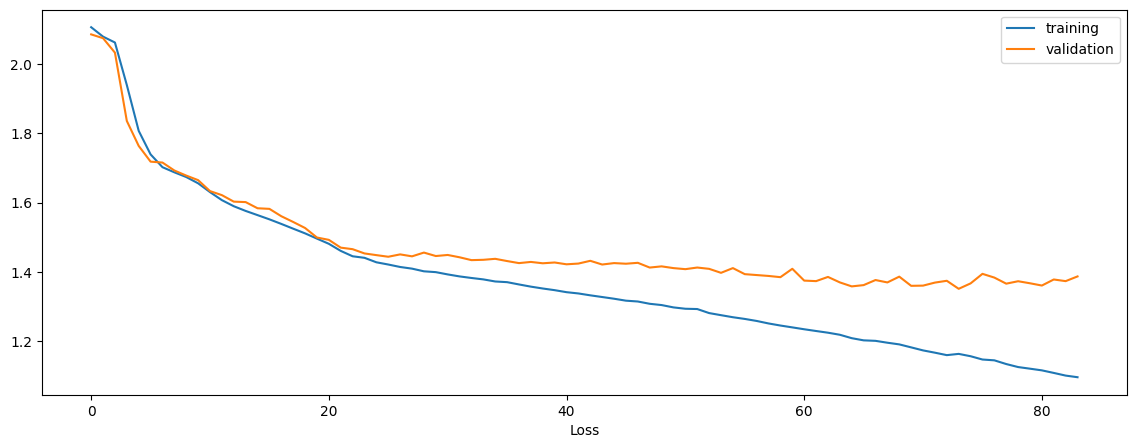

In [6]:
from util import pickleLoad
from visual import plotHistory

history = pickleLoad('source/data/models/{}.pkl'.format(HASH))
plotHistory(history)

In [7]:
from util import getAccuarcy, predictInBatches

print('balanced')
print(getAccuarcy(train[1],predictInBatches(model,train[0],architecture['batch_size'])))
print(getAccuarcy(val[1],predictInBatches(model,val[0],architecture['batch_size'])))
print(getAccuarcy(test[1],predictInBatches(model,test[0],architecture['batch_size'])))

balanced


0.5631056257534213


0.4832544120363374


0.46536563781455964


In [9]:
props2 = props.copy()
props2['balance_data'] = False
gen2 = DataGenerator(**props2)
gen2.pca_obj = gen.pca_obj
gen2.pca_comps = gen.pca_comps
train2, val2, test2 = gen2.getData()

print('original')
print(getAccuarcy(train2[1],predictInBatches(model,train2[0],architecture['batch_size'])))
print(getAccuarcy(val2[1],predictInBatches(model,val2[0],architecture['batch_size'])))
print(getAccuarcy(test2[1],predictInBatches(model,test2[0],architecture['batch_size'])))

original


0.4552513495884861


0.41177807577789394


0.40757287784168045


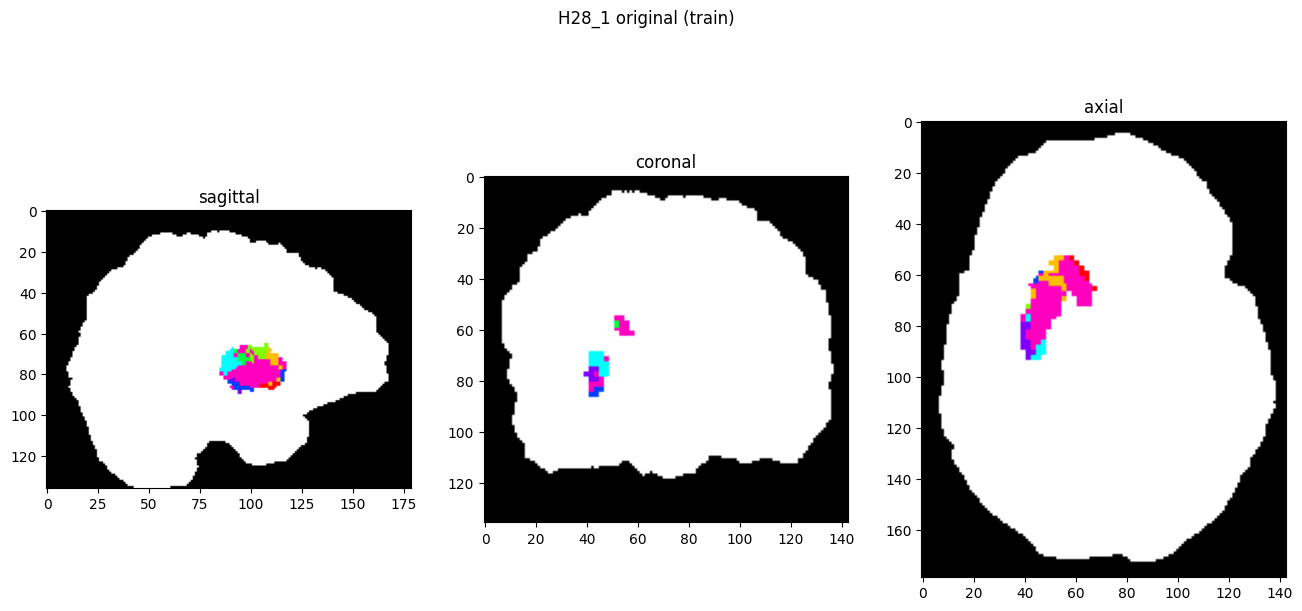

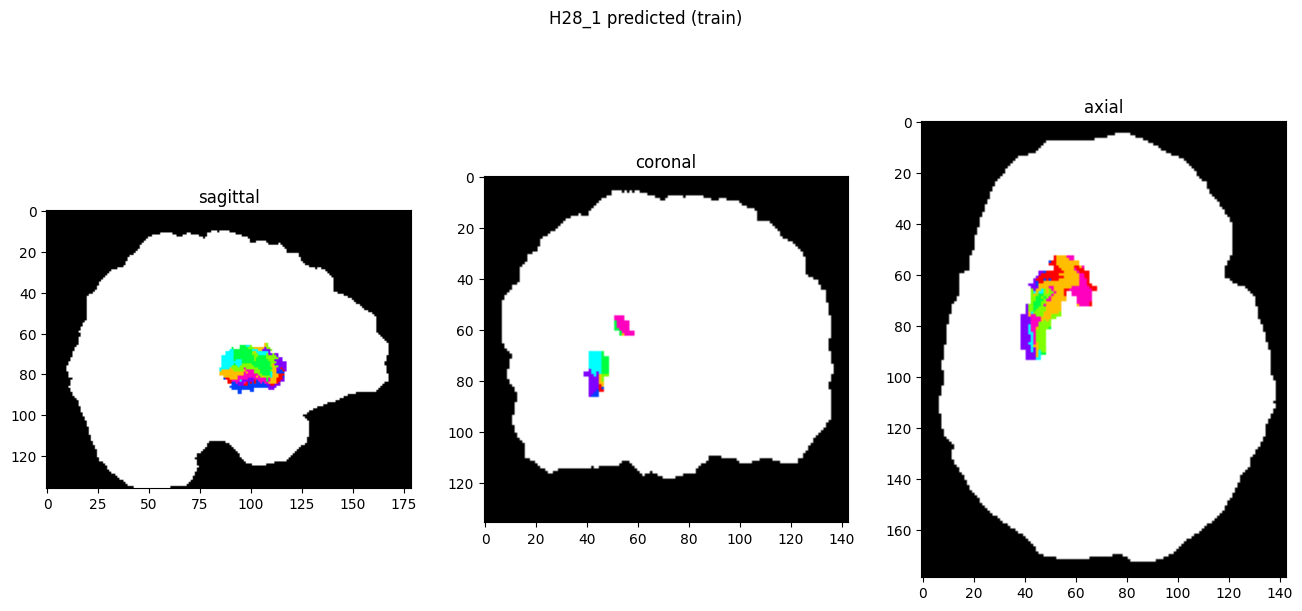

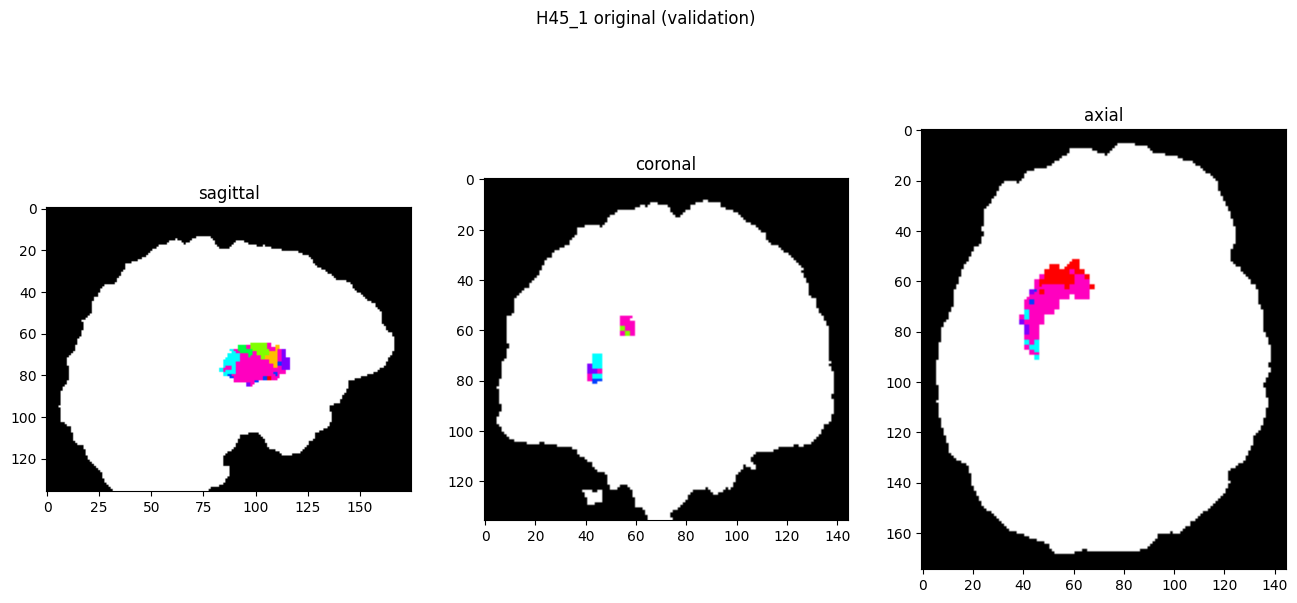

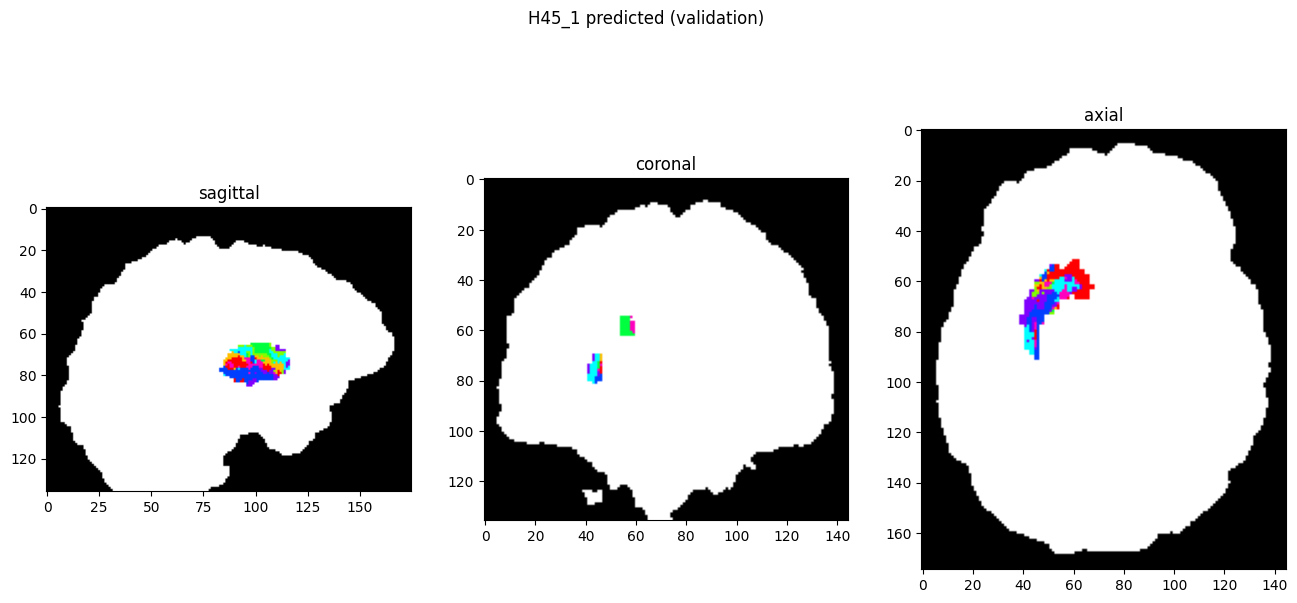

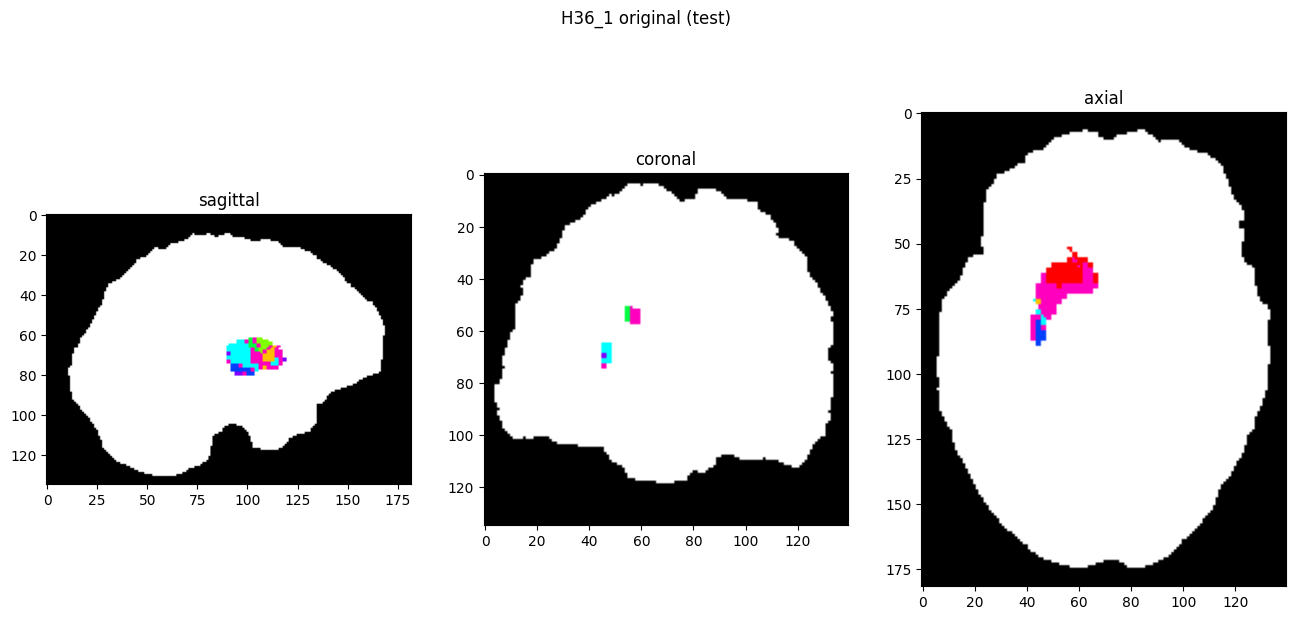

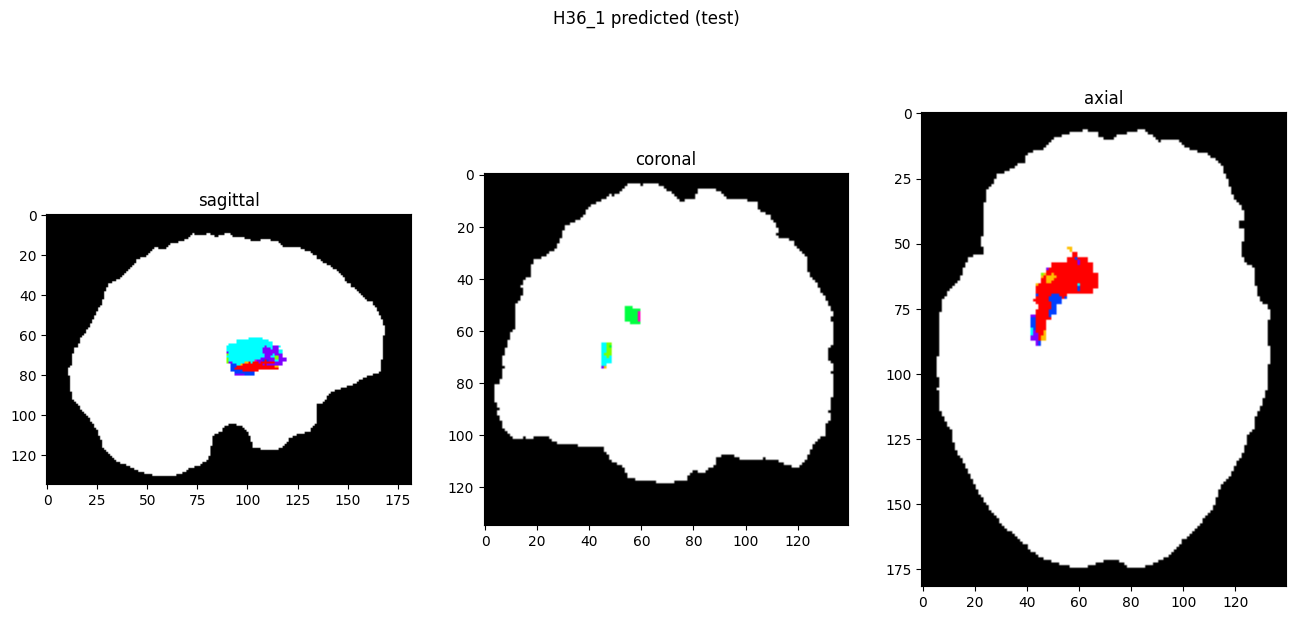

In [10]:
showResults(model, gen, threshold=0)